#                               Hotel Booking Data Analysis

## Objective 

<b> The project aims to provide a comparitive study of the City Hotel and the Resort Hotel under consideration and draw insights on various customer trends and preferences to evaluate the performances of both the hotels which could undoubtedtly be used to drive future decisions and strategies for improving the same. </b>


### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

### Reading the Data

In [2]:
file_path=('/Users/aravindnambiar/Downloads/hotel_bookings.csv')

df=pd.read_csv(file_path)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


### Checking General Characteristics of Data

In [3]:
df.shape

(119390, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Dealing with NULL Values

In [7]:
# Since null value count of country is very small, it is convenient to drop it

df.dropna(subset=['country'],axis=0,inplace=True)

In [8]:
# Since null value count of country is very large, it is convenient to drop it, since replacing would be meaningless

df.drop(axis=1,columns='company',inplace=True)

In [9]:
# Since null value count of children is extremely small, it is convenient to drop it

df.dropna(subset=['children'],axis=0,inplace=True)

In [10]:
# Dropping the agent column as the values are not of importance in this analysis

df=df.drop(columns='agent',axis=1)

In [11]:
# Checking the shape of the DataFrame

df.shape

(118898, 30)

In [12]:
# Rechecking if all NULL Values have been dealt with

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Column Operations

In [13]:
# Converting children column from float to integer

df['children']=df['children'].astype('int')

In [14]:
# Converting reservation_status_date column from object to datetime

df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [15]:
# Adding a Total_customer column to get a total count of residents

df['Total_customers']=df['adults'] + df['children'] + df['babies']

In [16]:
# Renaming some columns for convenience

df=df.rename(columns={'arrival_date_year' : 'arrival_year','arrival_date_month' : 'arrival_month',
                   'arrival_date_week_number' : 'arrival_week_number','arrival_date_day_of_month' : 'arrival_day_of_month'})

## Lead Time

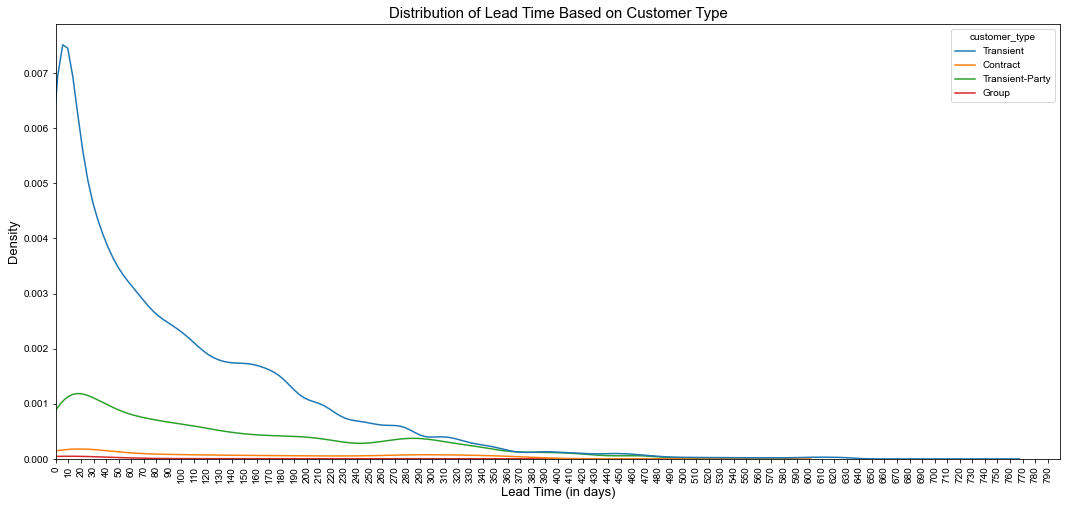

In [17]:
# Distribution of Lead Time Based on Customer Type

plt.figure(figsize=(18,8))
sns.kdeplot(df['lead_time'],hue=df['customer_type'])
sns.set_style('whitegrid')
plt.xticks(ticks=range(0,800,10),rotation=90)
plt.xlim(0,800)
plt.xlabel('Lead Time (in days)',fontsize=13)
plt.ylabel('Density',fontsize=13)
plt.title('Distribution of Lead Time Based on Customer Type',fontsize=15)
plt.show()

### Terms:

* <b> Transient        : Customers who book the hotels directly by themselves.</b>


* <b> Transient-Party : Customers who book the hotels by themselves but is associated to atleast another transient booking.</b>


* <b> Contract         : Customers whose booking has an allotment or other type of contract associated with it.</b>


* <b> Group            : When the booking is associated to a group.</b>

### Insights:

* <b>The most popular customer type are the transient customers and most of the customers book the hotels within 10 days prior to their arrival. We can see that this group of customers have also had the longest lead times as well.</b>


* <b> Following that in popularity are the transient party customers and most of them book the hotels within 10-20 days prior to their arrival.</b>


* <b>Least in popularity are the contract and group type customers respectively and their lead time is almost stagnant.</b>




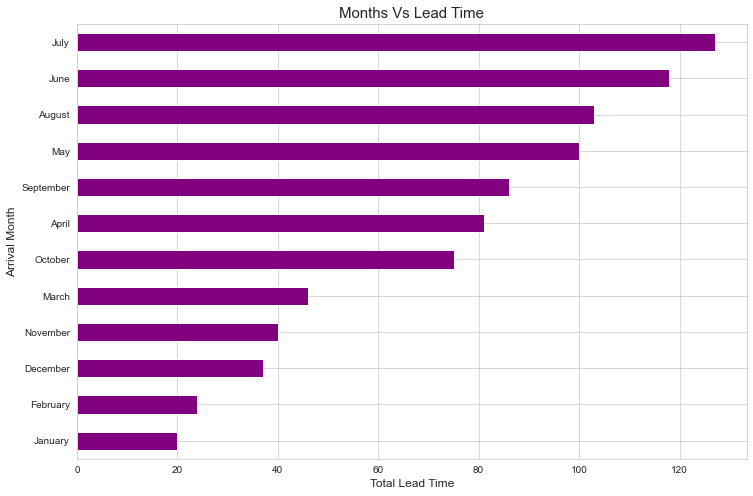

In [18]:
# Lead Time Based on Month

df_lead=df.groupby('arrival_month').median()['lead_time'].sort_values()
plt.figure(figsize=(12,8))
df_lead.plot.barh(x='arrival_month',y='Total_lead_time',color='purple')
sns.set_style('whitegrid')
plt.xlabel('Total Lead Time',fontsize=12)        
plt.ylabel('Arrival Month',fontsize=12)
plt.title('Months Vs Lead Time',fontsize=15)
plt.show()

### Insights:


* <b> July, June, August and May (Summer season) are the months with the highest median lead times respectively. This means that customers generally tend to book their rooms a lot earlier in these months prior to their arrival.</b>


* <b> January, February and December (Winter season) are the months with least median lead times respectively. This means that customers book their rooms in a relatively short notice prior to their arrival in these months. </b>



# Customer Trends

### Hotels Vs Total Customers:

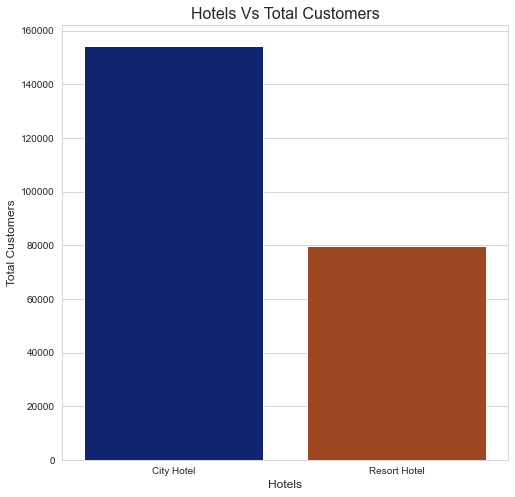

In [19]:

df_temp=df.groupby('hotel').sum()['Total_customers'].reset_index()
plt.figure(figsize=(8,8))
sns.barplot(x='hotel',y='Total_customers',data=df_temp,palette='dark')
sns.set_style('whitegrid')

plt.xlabel('Hotels',fontsize=12)        
plt.ylabel('Total Customers',fontsize=12)

plt.title('Hotels Vs Total Customers',fontsize=16)
plt.show()


### Insights:

* <b>Overall,the City hotel is outperforming the Resort hotel by hosting more customers over the years. The number of customers for the City hotel (160000 customers) is almost double that of the Resort hotel (approximately 80000 customers). </b>


### Month of Arrival Vs Total Customers:

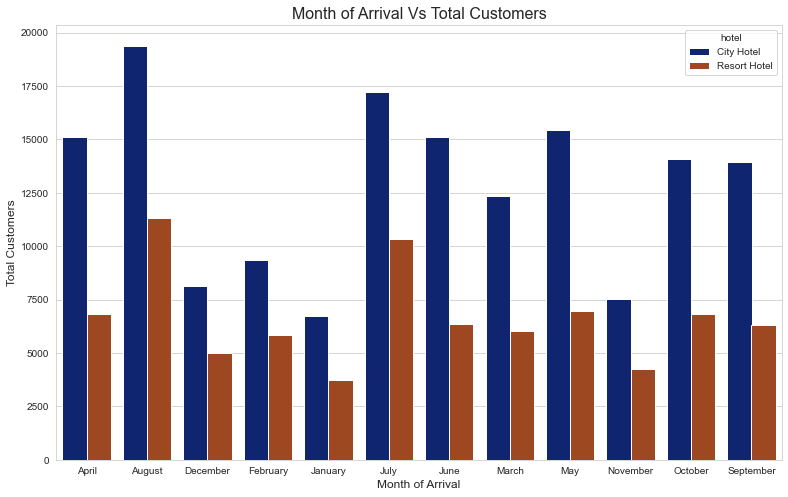

In [20]:

df_temp=df.groupby(['hotel','arrival_month']).sum()['Total_customers']
df_temp=df_temp.reset_index()
plt.figure(figsize=(13,8))
sns.barplot(x='arrival_month',y='Total_customers',data=df_temp,hue='hotel',palette='dark')
sns.set_style('whitegrid')

plt.xlabel('Month of Arrival',fontsize=12)        
plt.ylabel('Total Customers',fontsize=12)

plt.title('Month of Arrival Vs Total Customers',fontsize=16)
plt.show()

### Insights:

* <b>Overall,the City hotel once again is outperforming Resort hotel by drawing more customers throughout the year.</b>


* <b> August is the busiest month for City hotel (almost hosting 20,000 customers) as well as for the Resort hotel (almost hosting above 10,000 customers). It is followed by July, May and June being the next busiest months  respectively for the City hotel and July, May, Arpil and October for the Resort Hotel.  </b>


* <b> January is the least busiest month for both hotels with City hotel attracting less than 7500 customers (almost 63% less compared to August) and the Resort hotel hosting around 3000 customers (almost 70% less compared to August). These are followed by November and December being the next least busiest for both hotels.</b>


* <b> Since the Summer months are generally the busiest, the increasing trends in lead time for these months as discussed earlier may be due to high booking demands and the customers tend to book the rooms way in advance.
Whereas, the relatively shorter lead times in winter may be the result of less booking demands.</b>


### Year of Arrival Vs Total Customers:

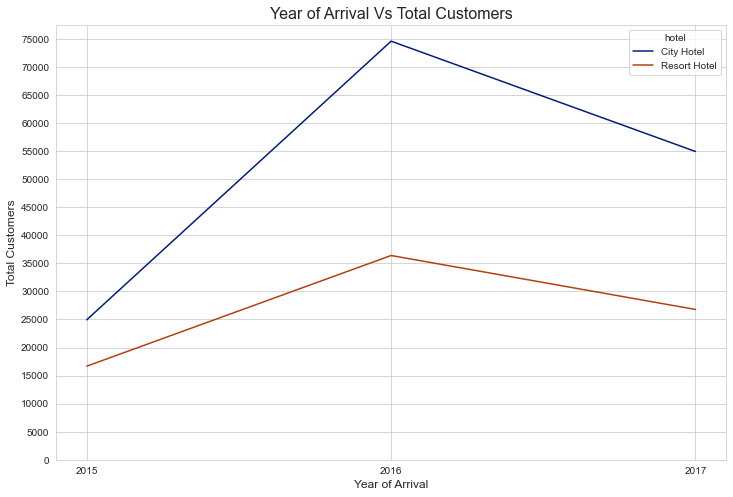

In [21]:

df_temp=df.groupby(['hotel','arrival_year']).sum()['Total_customers'].reset_index()
plt.figure(figsize=(12,8))
sns.lineplot(x='arrival_year',y='Total_customers',data=df_temp,hue='hotel',palette='dark')
sns.set_style('whitegrid')
plt.xticks(ticks=[2015,2016,2017])
plt.xlabel('Year of Arrival',fontsize=12)        
plt.ylabel('Total Customers',fontsize=12)
plt.yticks(range(0,80000,5000))
plt.title('Year of Arrival Vs Total Customers',fontsize=16)
plt.show()


  ### Insights:

* <b>Overall, 2016 has been the most promising year for both the City hotel as well as the Resort hotel hosting about 75000 customers and above 35000 customers respectively. As we can see, the Resort hotel had less than 50% of the customers when compared to the City hotel. </b>


* <b> 2015 was the least promising year in which the City hotel hosted only 25000 customers and the Resort hotel had approximately 17000 customers. It is intereting to note that the following year 2016 saw a 200% hike in customers for City hotel and more than 100% increase in customers for the Resort hotel. </b>


* <b> 2017 saw a slight decrease in customers for both hotels with the City hotel touching a customer count of 55000 (27% lesser than 2016) and the Resort hotel had almost 27000 customers(23% lesser than 2016).</b>



### Month of Arrival Vs Kids:

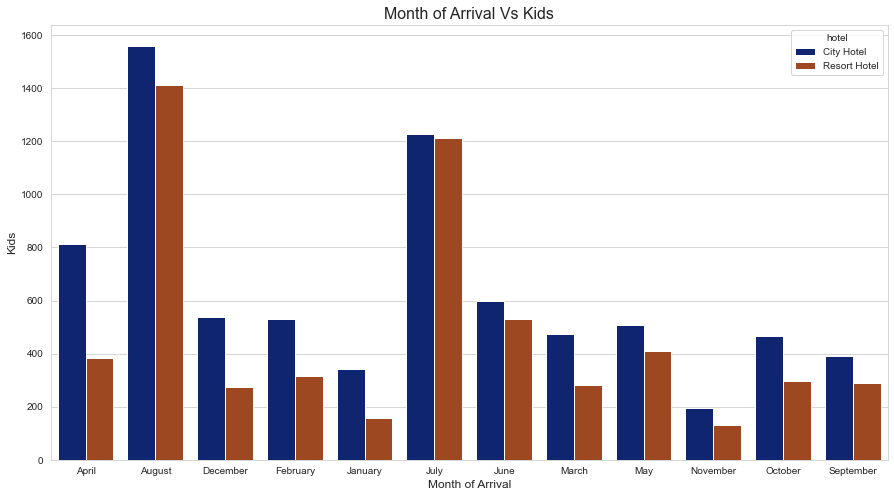

In [22]:

df['Kids']=df['children'] + df['babies']

df_temp=df.groupby(['hotel','arrival_month']).sum()['Kids']
df_temp=df_temp.reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x='arrival_month',y='Kids',data=df_temp,hue='hotel',palette='dark')
sns.set_style('darkgrid')

plt.xlabel('Month of Arrival',fontsize=12)        
plt.ylabel('Kids',fontsize=12)
plt.title('Month of Arrival Vs Kids',fontsize=16)
plt.show()




### Insights:

* <b> August is the month that most people prefer to travel with kids (children and babies) to both the hotels with the City hotel  hosting more customers than the Resort hotel. It is followed by  July and April being the next preferred months for the City hotel while it is July and June for the Resort hotel. This could be because most people choose to visit the hotels in Summer season as discussed earlier and may  prefer to travel with their families for vacations.</b>


* <b> November and January are the least preferred months respectively that people chose to travel with their kids to the hotels, with the Resort hotel hosting the least number of kids in November.This could be because most people do not prefer to visit the hotels in Winter season as discussed earler and may not prefer to travel with their families.</b>




### Total Customers as Families(with kids) and as Adults (without kids) in Hotels:

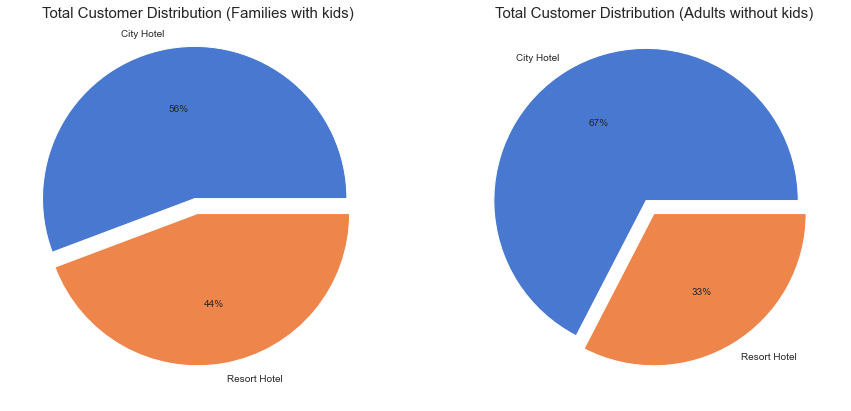

In [23]:

df_fam=df[(df['adults']!=0) & (df['Kids']!=0)]
df_not_fam=df[(df['adults']!=0) & (df['Kids']==0)]

df_fam_temp=df_fam.groupby('hotel').sum()['Total_customers']
df_not_fam_temp=df_not_fam.groupby('hotel').sum()['Total_customers']


fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(121)


color=sns.color_palette(palette='muted')
ax1.pie(x=df_fam_temp,labels=['City Hotel','Resort Hotel'],colors=color,explode=[0.1,0],autopct='%.f%%')
plt.title('Total Customer Distribution (Families with kids)',fontsize=15)

ax2=fig.add_subplot(122)
ax2.pie(x=df_not_fam_temp,labels=['City Hotel','Resort Hotel'],colors=color,explode=[0.1,0],autopct='%.f%%')
plt.title('Total Customer Distribution (Adults without kids)',fontsize=15)








plt.show()

  ### Insights:

* <b>It is interesting to note that families with kids significantly prefer the Resort hotel (44%) almost as much as they prefer City hotel (56%). On the other hand, adults without kids prefer the City hotel (67%) much more than the Resort hotel (33%).</b>





### Cancellation Trends of Hotels:

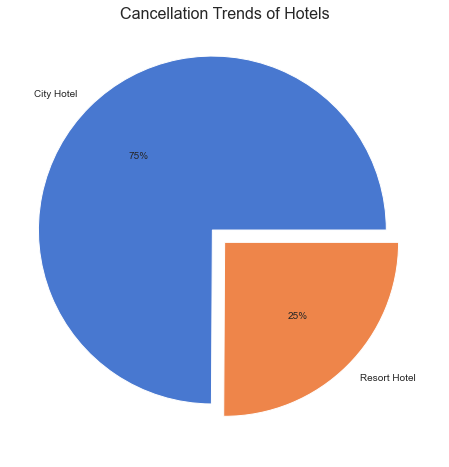

In [24]:

df_can=df.groupby('hotel').sum()['is_canceled']
color=sns.color_palette(palette='muted')
plt.figure(figsize=(8,8))
plt.pie(x=df_can,colors=color,labels=['City Hotel','Resort Hotel'],explode=[0.1,0],autopct='%.f%%')
plt.grid()
plt.title('Cancellation Trends of Hotels',fontsize=16)
plt.show()

### Insights:

* <b> Overall, it is interesting to note that of all the cancellations, almost 75% of the cancellations are for the City hotel while only 25% of the cancellations are for the Resort Hotel. </b>


* <b> This could be due to the fact that the number of customers are very large for the City Hotel when compared to the Resort Hotel. On the other hand, it could also mean that the probability of a customer cancelling a booking with the Resort Hotel is much smaller than the probability of cancellation with the City Hotel. </b>

### Cancellation Trends of Families (with kids) and Adults ( without kids):

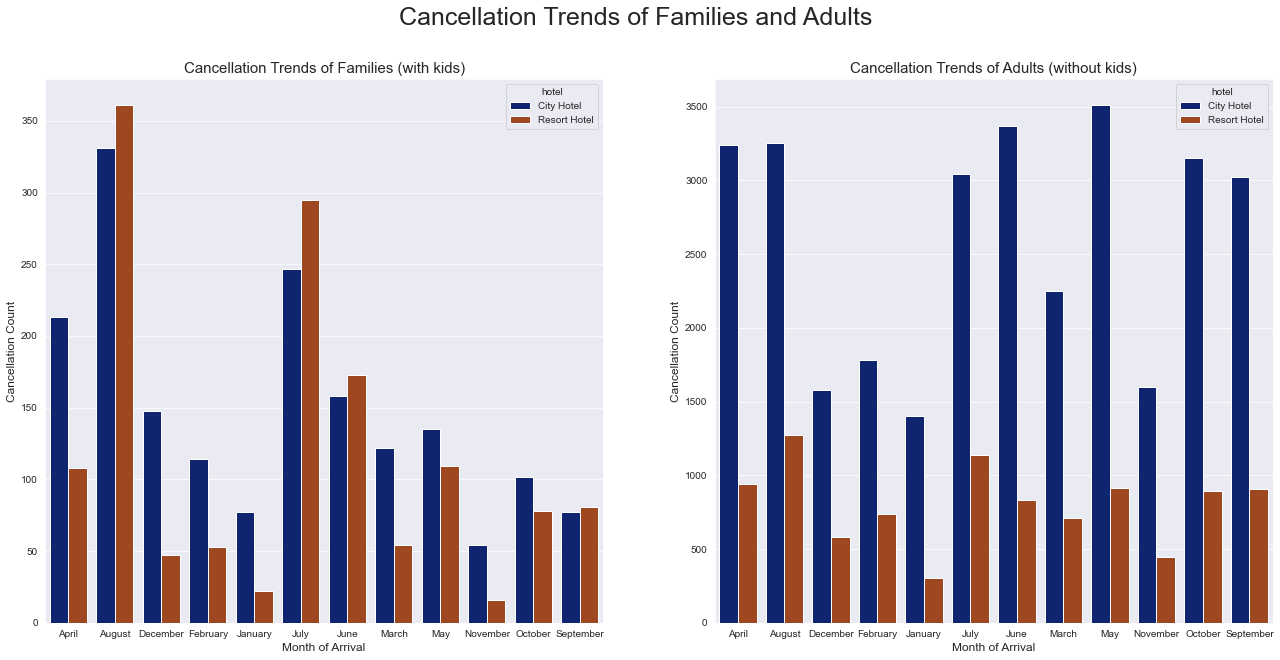

In [25]:


df_fam_temp=df_fam.groupby(['hotel','arrival_month']).sum()['is_canceled'].reset_index()

df_not_fam_temp=df_not_fam.groupby(['hotel','arrival_month']).sum()['is_canceled'].reset_index()


figure,axes=plt.subplots(1,2,figsize=(22,10))



sns.barplot(x='arrival_month',y='is_canceled',data=df_fam_temp,hue='hotel',palette='dark',ax=axes[0])
sns.barplot(x='arrival_month',y='is_canceled',data=df_not_fam_temp,hue='hotel',palette='dark',ax=axes[1])

sns.set_style('whitegrid')

axes[0].set_xlabel('Month of Arrival',fontsize=12)
axes[1].set_xlabel('Month of Arrival',fontsize=12)


axes[0].set_ylabel('Cancellation Count',fontsize=12)
axes[1].set_ylabel('Cancellation Count',fontsize=12)


axes[0].set_title('Cancellation Trends of Families (with kids)',fontsize=15)
axes[1].set_title('Cancellation Trends of Adults (without kids)',fontsize=15)

plt.suptitle('Cancellation Trends of Families and Adults ',fontsize=25)

plt.show()

  ### Insights:

* <b> The cancellation count of families with kids is the highest in the month of August for both the Resort Hotel and the City hotel with the former being the highest. These are followed by the months of July and April for the City Hotel in being the next highest and months of July and June for the Resort Hotel.</b>


* <b> Even though the total customer distribution of families with kids is almost equal for both the hotels, the cancellation counts are the highest for the Resort Hotel in the months of August and July when compared to the City Hotel. However, in the rest of the months, Resort Hotel performs significantly better than the City Hotel in cancellation counts.


* <b> The cancellation count of adults without kids is the highest in the month of May for the City Hotel and August for the Resort hotel. These are followed by the months of June, August and April for the City Hotel in being the next highest and months of July, April and May for the Resort Hotel.</b>

    
    
* <b> The overall higher cancellation counts of adults without kids for the City Hotel throughout the year when compared to the Resort Hotel may be due to the significant higher customer distribution of this category associated with the City Hotel.</b>

    
 * <b> It is also interesting to note that November and January are the months with least cancellation counts for both the categories with both the hotels. This could be due to lowest customer inflow during the Winter season as seen earlier and vice versa for the Summer season with the highest cancellation counts. <b>

### Lead Time Trends of Families (with kids) and Adults ( without kids):

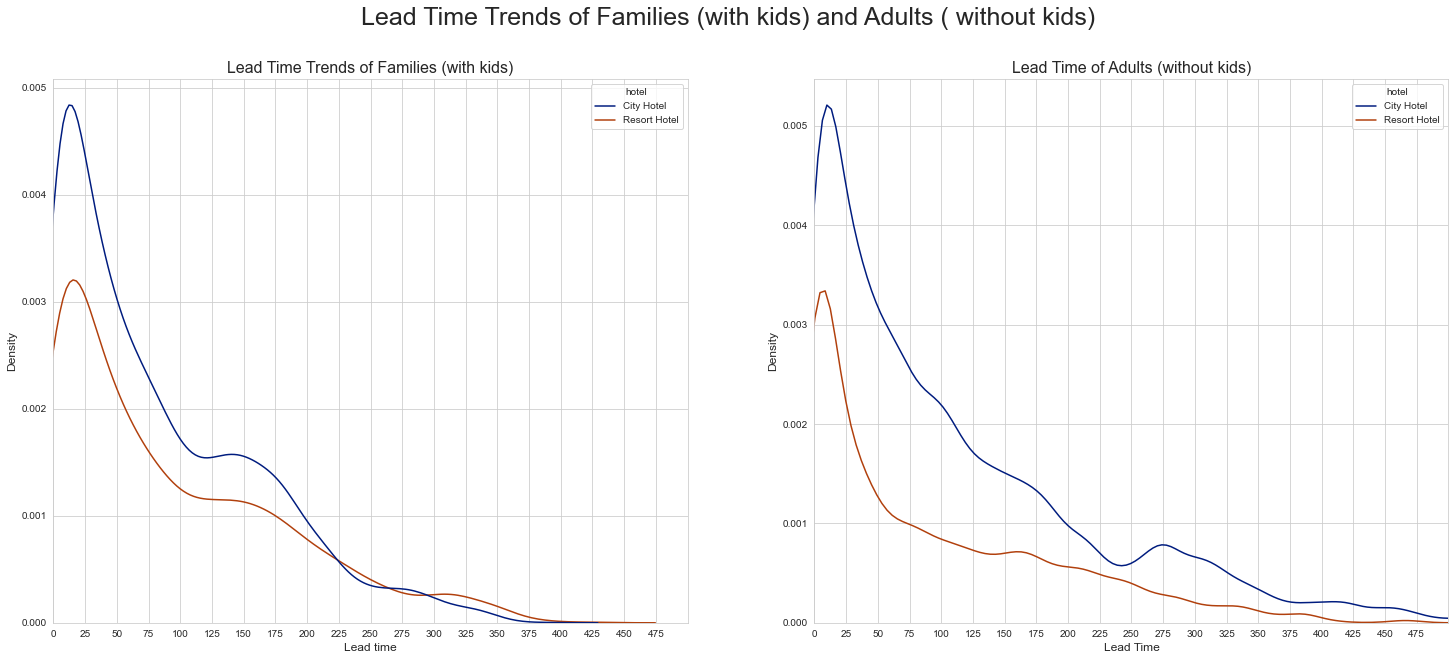

In [26]:

figure,axes=plt.subplots(1,2,figsize=(25,10))


sns.kdeplot(x=df_fam['lead_time'],hue=df_fam['hotel'],hue_order=['City Hotel','Resort Hotel'],palette='dark',ax=axes[0])

sns.kdeplot(x=df_not_fam['lead_time'],hue=df_not_fam['hotel'],palette='dark',hue_order=['City Hotel','Resort Hotel'],ax=axes[1])
sns.set_style('whitegrid')

axes[0].set_xticks(ticks=range(0,500,25))
axes[0].set_xlim(0,500)

axes[1].set_xticks(ticks=range(0,500,25))
axes[1].set_xlim(0,500)



axes[0].set_xlabel('Lead time',fontsize=12)
axes[1].set_xlabel('Lead Time',fontsize=12)


axes[0].set_ylabel('Density',fontsize=12)
axes[1].set_ylabel('Density',fontsize=12)


axes[0].set_title('Lead Time Trends of Families (with kids)',fontsize=16)
axes[1].set_title('Lead Time of Adults (without kids)',fontsize=16)

plt.suptitle('Lead Time Trends of Families (with kids) and Adults ( without kids)',fontsize=25)
plt.show()

  ### Insights:

* <b> In contrary to the popular belief that people with kids book their rooms more in advance as compared to adults without kids, it is interesting to note that the lead times for both people with kids and without kids is almost the same, with the highest number of people booking within 25 days prior to their arrival in both categories. In short, the lead time remains unaffected for both categories. </b>



### Meal Preferences of Customers:

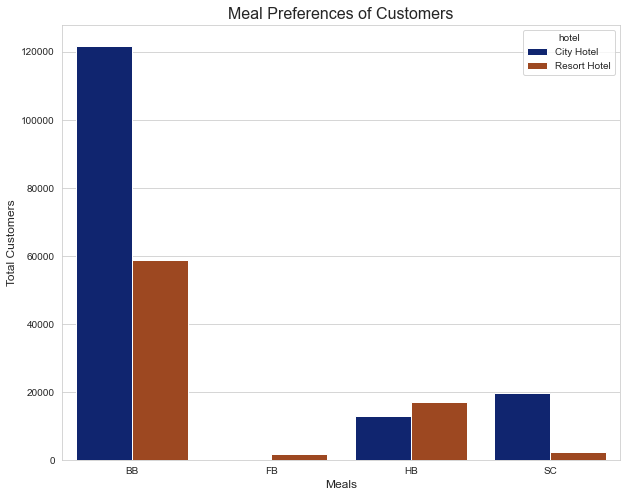

In [27]:

df['meal']=df['meal'].replace('Undefined','SC')


df_meal=df.groupby(['hotel','meal']).sum()['Total_customers']
df_meal=df_meal.reset_index()

plt.figure(figsize=(10,8))
sns.barplot(x='meal',y='Total_customers',data=df_meal,hue='hotel',palette='dark')

plt.xlabel('Meals',fontsize=12)
plt.ylabel('Total Customers',fontsize=12)
plt.title('Meal Preferences of Customers',fontsize=16)

plt.show()



### Terms:

* <b> BB        :  Bed and Breakfast</b>


* <b> FB        : Full board (breakfast, lunch and dinner) </b>


* <b> HB        : Half board (breakfast and one other meal – usually dinner)</b>


* <b> SC        : No meal package</b>

### Insights:

* <b> Overall, BB is the most preferred meal type and FB is the least preferred meal type for both the City Hotel and the Resort hotel. SC and HB follows BB in being the next most preferred meal categories for the City Hotel while it is HB and SC respectively for the Resort Hotel. </b>


* <b> The proportion of customers opting for FB in the city hotel is almost negligible or near to zero and is also very less for the Resort Hotel. This provides a very interesting insight that most of the people don't like sticking to the same hotel for all their meals and the customers prefer the BB category the most as it may be more convenient to have only breakfast from the place of stay.  </b>


* <b>It is also interesting to note that even with a smaller proportion of customers in total, the number of customers opting for the HB category in the Resort Hotel is more than the City Hotel. </b>






### Total Special Requests Distribution:

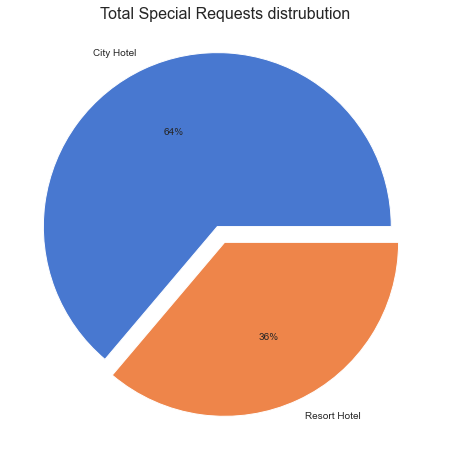

In [28]:


df_spl=df.groupby('hotel').sum()['total_of_special_requests']


plt.figure(figsize=(8,8))
color=sns.color_palette('muted')
plt.pie(x=df_spl,labels=['City Hotel','Resort Hotel'],explode=[0.1,0],colors=color,autopct='%.f%%')


plt.title('Total Special Requests distrubution',fontsize=16)

plt.show()


### Insights:

* <b> The proportion of the total special requests is higher for the City Hotel when compared to the Resort Hotel. This may be due to larger number of customers opting for the City Hotel as discussed earlier. However, it is worthwhile noting that even though the customer count is relatively lesser for the Resort Hotel, the proportion of its total special requests is not too far behind the City hotel. </b>





### Special Requests of Families(with kids) and Adults (without kids) :

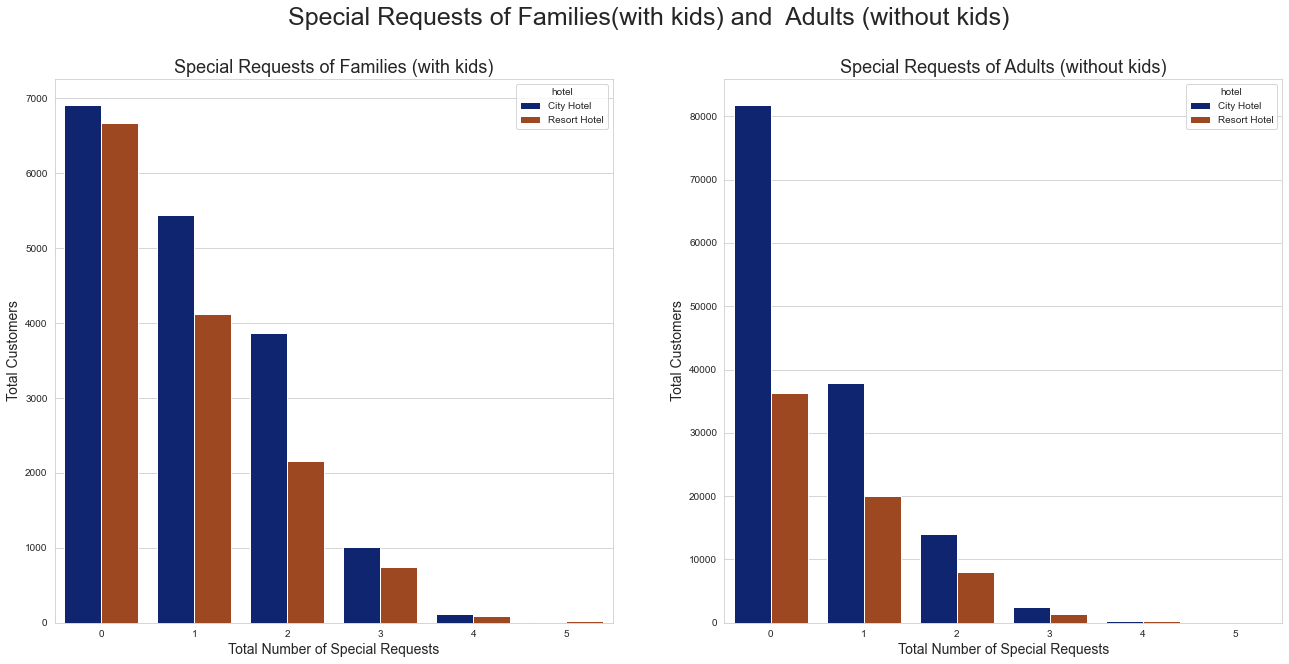

In [29]:


df_fam_temp1=df_fam.groupby(['hotel','total_of_special_requests']).sum()['Total_customers'].reset_index()
df_not_fam_temp1=df_not_fam.groupby(['hotel','total_of_special_requests']).sum()['Total_customers'].reset_index()

figure,axes=plt.subplots(1,2,figsize=(22,10))



sns.barplot(x='total_of_special_requests',y='Total_customers',data=df_fam_temp1,hue='hotel',palette='dark',ax=axes[0])
sns.barplot(x='total_of_special_requests',y='Total_customers',data=df_not_fam_temp1,hue='hotel',palette='dark',ax=axes[1])
sns.set_style('whitegrid')

axes[0].set_xlabel('Total Number of Special Requests',fontsize=14)
axes[1].set_xlabel('Total Number of Special Requests',fontsize=14)


axes[0].set_ylabel('Total Customers',fontsize=14)
axes[1].set_ylabel('Total Customers',fontsize=14)


axes[0].set_title('Special Requests of Families (with kids)',fontsize=18)
axes[1].set_title('Special Requests of Adults (without kids)',fontsize=18)

plt.suptitle('Special Requests of Families(with kids) and  Adults (without kids)',fontsize=25)
plt.show()

### Insights:

* <b> Overall, it can be noted that the number of customers opting for higher number of special requests are lesser and a decreasing trend is observed for the same for both the hotels. </b>


* <b> It is seen that the number of special requests of families is quite significant in relation to the total number of customers in this category. With above 30000 customers as families in total, about 60% of the customers from the City Hotel and 52% of the customers from the Resort Hotel have opted for atleast 1 special request. </b>


* <b>It is also interesting to note that with above 200000 customers in the Adults (without kids) category, about 41% of the customers from the City Hotel and 44% of the customers from the Resort Hotel have opted for atleast 1 special request which is significantly lesser than the special request proportions of families for both the hotels.  </b>



* <b> From the above observations, it may be inferred that a customer is more likely to make a special request if they are accompanied by children.  </b>


### Customer Inflow : Top 10 Countries

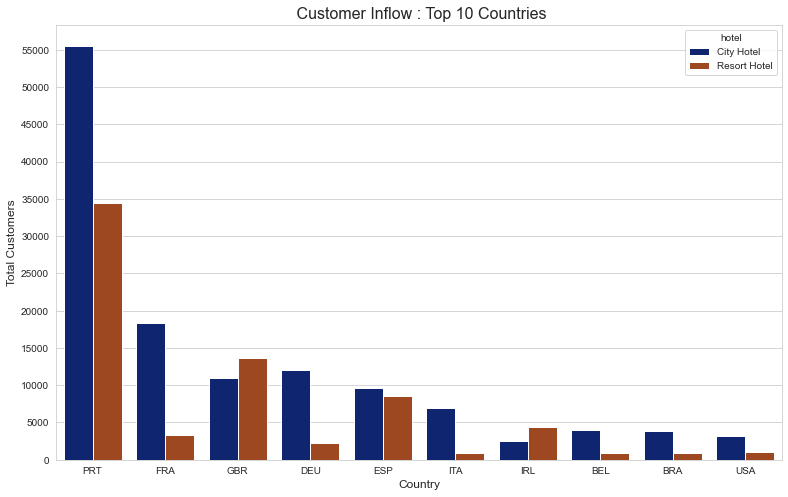

In [30]:
df_con=df.groupby('country').sum()['Total_customers'].sort_values(ascending=False).head(10).to_frame()
df_con=df_con.reset_index()
countries=list(df_con['country'])
df_temp=df[df['country'].isin(countries)]

df_temp1=df_temp.groupby(['hotel','country']).sum()['Total_customers'].sort_values(ascending=False).reset_index()
plt.figure(figsize=(13,8))
ax=sns.barplot(x='country',y='Total_customers',data=df_temp1,hue='hotel',palette='dark')

sns.move_legend(ax,loc='upper right')
plt.xlabel('Country',fontsize=12)
plt.yticks(range(0,60000,5000))
plt.ylabel('Total Customers',fontsize=12)
plt.title(' Customer Inflow : Top 10 Countries',fontsize=16)

plt.show()



### Terms:

* <b> PRT        : Portugal</b>


* <b> FRA        : France  </b>


* <b> GBR        : Great Britain</b>


* <b> DEU        : Germany</b>


* <b> ESP        : Spain</b>


* <b> ITA        : Italy</b>


* <b> IRL        : Ireland</b>


* <b> BEL        : Belgium</b>


* <b> BRA        : Brazil</b>


* <b> USA        : The United States of America</b>





### Insights:

* <b> The plot shows the top 10 countries from which most customers visit the hotels. Being the hometown, most of the customers (around 90000 customers - 37%) are from Portugal for both the Hotels. It is then followed by France, Germany, Great Britain and Spain for the City Hotel and Great Britain, Spain, Ireland and France for the City Hotel in being the next top countries in customer count after Portugal. </b>


* <b> It is interesting to note that even though for most countries it is the City Hotel that is more preferred, customers from Ireland prefer the Resort Hotel more than the City Hotel and the customers from Spain prefer the Resort Hotel almost as much as they prefer the City Hotel. </b>




### Distribution of Customers by Top Countries Over the Top Months

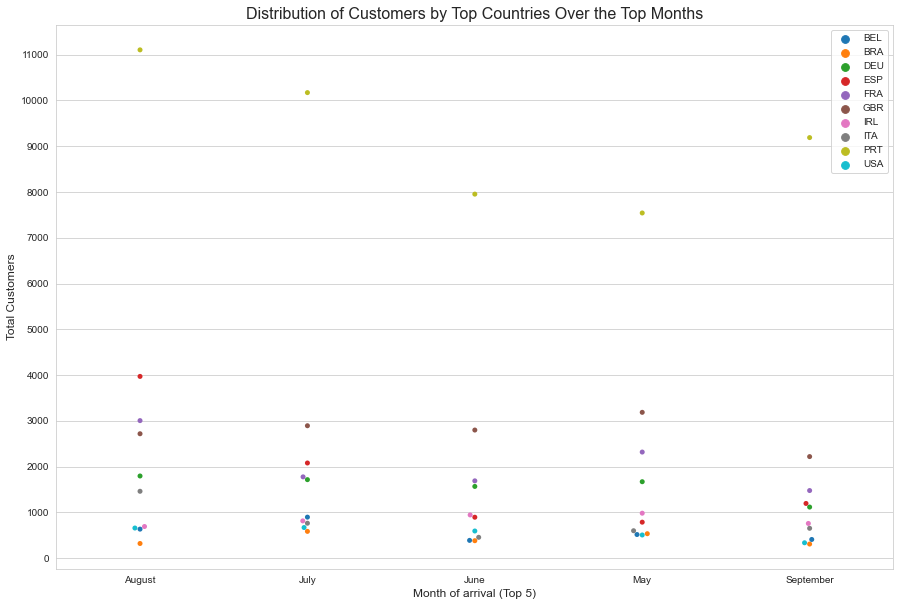

In [31]:
df_con=df.groupby('country').sum()['Total_customers'].sort_values(ascending=False).head(10).to_frame().reset_index()
countries=list(df_con['country'])
df_temp=df[df['country'].isin(countries) & df['arrival_month'].isin(['May','June','July','August','September'])]

df_grp=df_temp.groupby(['country','arrival_month']).sum()['Total_customers'].reset_index()

plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.swarmplot(x='arrival_month',y='Total_customers',data=df_grp,hue='country')
plt.legend(fontsize=10)
plt.xlabel('Month of arrival (Top 5)',fontsize=12)
plt.ylabel('Total Customers',fontsize=12)
plt.yticks(range(0,12000,1000))
plt.title('Distribution of Customers by Top Countries Over the Top Months',fontsize=16)

plt.show()


### Insights:

* <b> Portugal being the hometown as discussed earlier, both the hotels draw the maximum number of customers throughout the Summer months from Portugal which accounts for about 36% of the total customers in the busiest month of August and about 37% in the month of July. It is then followed by countries like France, Great Britian, Spain and Germany throughout the most occupied Summer months. </b>



### Customer Categories:

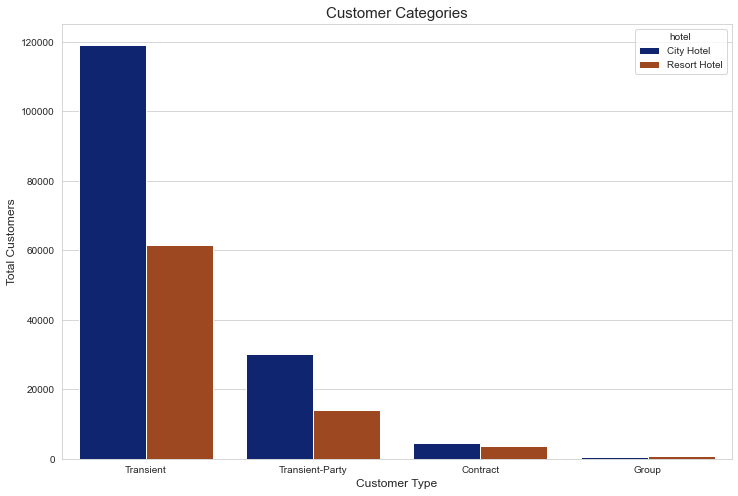

In [32]:
df_con=df.groupby(['hotel','customer_type']).sum()['Total_customers'].sort_values(ascending=False)

df_con=df_con.reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x='customer_type',y='Total_customers',data=df_con,hue='hotel',palette='dark')


plt.xlabel('Customer Type',fontsize=12)
plt.ylabel('Total Customers',fontsize=12)
plt.title('Customer Categories',fontsize=15)

plt.show()




### Insights:

* <b> As previously observed for the distribution of lead time based on customer types, the transient customers are the most popular customer type (180000 customers) making up a significant proportion of the total number of customers (77%). It is then followed by the transient party and contract categories in being the next popular customer types for both the City Hotel as well as the Resort Hotel. The group category is the least popular for both the hotels.  </b>


* <b> The City Hotel hosts a higher number of customers than the Resort Hotel in almost all the categories. This may be due to the larger customer inflow for the City Hotel as discussed earlier. However, it is also worthwhile noting that the Resort Hotel hosts more number of customers in the group category than the City Hotel which may be an indication that more customers prefer the Resort Hotel while travelling in groups.   </b>



### Proportion of Customers by Market segments:

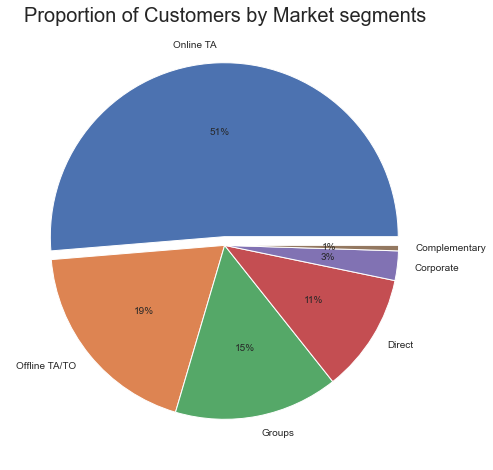

In [33]:
df_temp=df.groupby('market_segment').sum()['Total_customers'].sort_values(ascending=False).head(6)

label=df_temp.index
color=sns.color_palette(palette='deep',as_cmap=True)

plt.figure(figsize=(12,8))
plt.pie(x=df_temp,labels=label,explode=[0.05,0,0,0,0,0],colors=color,autopct='%.f%%')
plt.title('Proportion of Customers by Market segments',fontsize=20)
plt.show()

### Terms:

* <b> Online TA       :  Online Travel Agents</b>


* <b> Offline TA/TO   : Offline Travel Agents/ Tour Operators</b>


* <b> Groups          : When the booking is associated to a group (wedding parties, government groups etc)</b>


* <b> Direct          : When the booking is made directly with the hotel (mostly individual customers)</b>


* <b> Corporate       : When the booking is associated to a corporate (meetings, programs and related functions)</b>    
                                                                                       

* <b> Complimentary   : When the booking is complimenary</b>


### Insights:

* <b> Overall, it is evident that the majority of customers are drawn through Online TA which accounts to about half of the total customers (51%). It is then followed by Offline TA/TO, Groups and Direct category making up 19%, 15% and 11% of the total market segment while the Corporate and Complimentary categories remain negligible ( 4% of the market segment). </b>


* <b> These insights show the need/importance of online marketing for both the hotels and the popularity of various TA/TO both online and offline since they together make up for about 70% of the total market segment.</b>






### Proportion of Repeated Customers by Hotels:

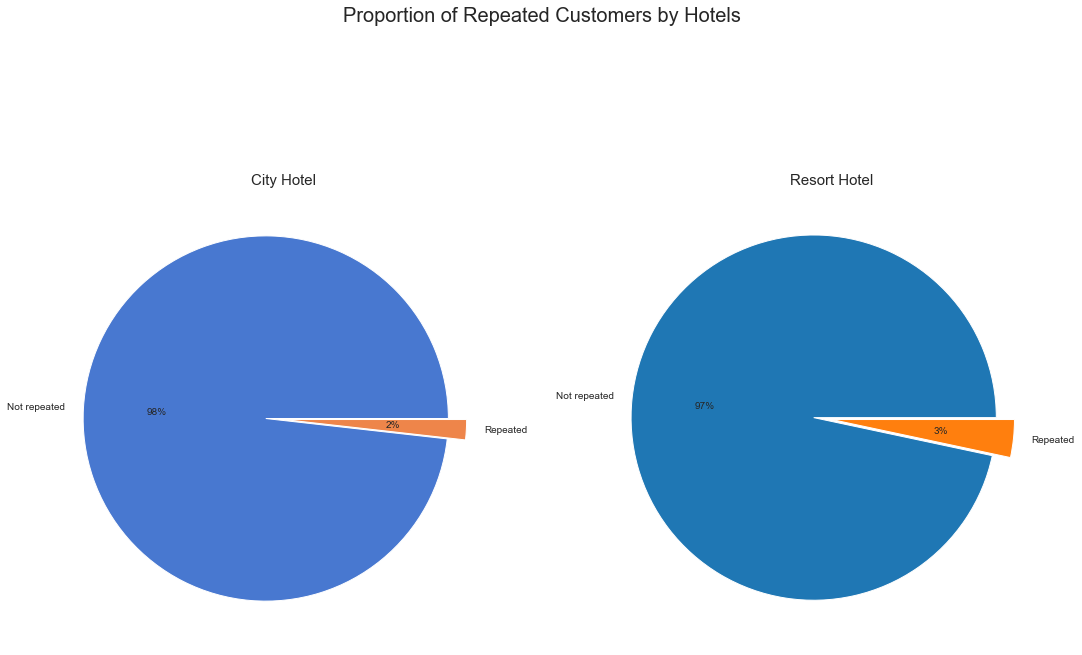

In [34]:
df_temp=df.groupby(['hotel','is_repeated_guest']).sum()['Total_customers']

fig=plt.figure(figsize=(18,12))
labels=['Not repeated','Repeated']
color=sns.color_palette(palette='muted',as_cmap=True)

ax1=fig.add_subplot(121)
ax1.pie(df_temp.loc['City Hotel'],labels=labels,colors=color,explode=[0.1,0],autopct='%.f%%')
ax1.set_title('City Hotel',fontsize=15)

ax2=fig.add_subplot(122)
ax2.pie(df_temp.loc['Resort Hotel'],labels=labels,explode=[0.1,0],autopct='%.f%%')
ax2.set_title('Resort Hotel',fontsize=15)

plt.suptitle('Proportion of Repeated Customers by Hotels', fontsize=20)

plt.show()


### Insights:

* <b> It is of atmost importance to note that only a very small fraction of the repeated customers are there for both the City Hotel and the Resort hotel (2% and 3% respectively). Factors affecting this should be carefully taken into consideration for improving the performance of both the hotels and thereby increasing the customer inflow. </b>







### Room preferences of Customers:

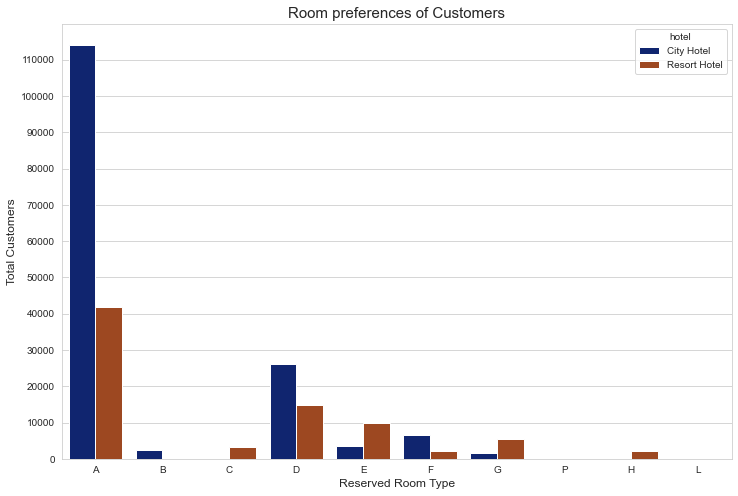

In [35]:
df_temp=df.groupby(['hotel','reserved_room_type']).sum()['Total_customers'].reset_index()
plt.figure(figsize=(12,8))

ax=sns.barplot(x='reserved_room_type',y='Total_customers',data=df_temp,hue='hotel',palette='dark')
sns.move_legend(ax,loc='upper right')
plt.yticks(range(0,120000,10000))
plt.xlabel('Reserved Room Type',fontsize=12)
plt.ylabel('Total Customers',fontsize=12)
plt.title('Room preferences of Customers',fontsize=15)
plt.show()


### Insights:

* <b> The room of type A is the most popular choice among the customers for both the hotels with about 66% of the total customers opting for the same. It is followed by type D and type F in being the next most popular choices for the City Hotel while it is type D and type E for the Resort Hotel. </b>


* <b> Even with a smaller proportion of customers in total, the number of customers opting for the rooms of type E, type G and type C are much more in the Resort Hotel than the City Hotel. The City hotel doesn't have a room of type H; hence a comparitive study would not be meaningful. However, it is interesting to note that the number of customers opting for the room of type B at the Resort Hotel is negligibly small when compared to the City Hotel.  </b>


* <b> The rooms of type P for the City hotel and type L for the Resort Hotel are the least preferred ones by the customers. </b>

### Proportions of Reassignment for Rooms:

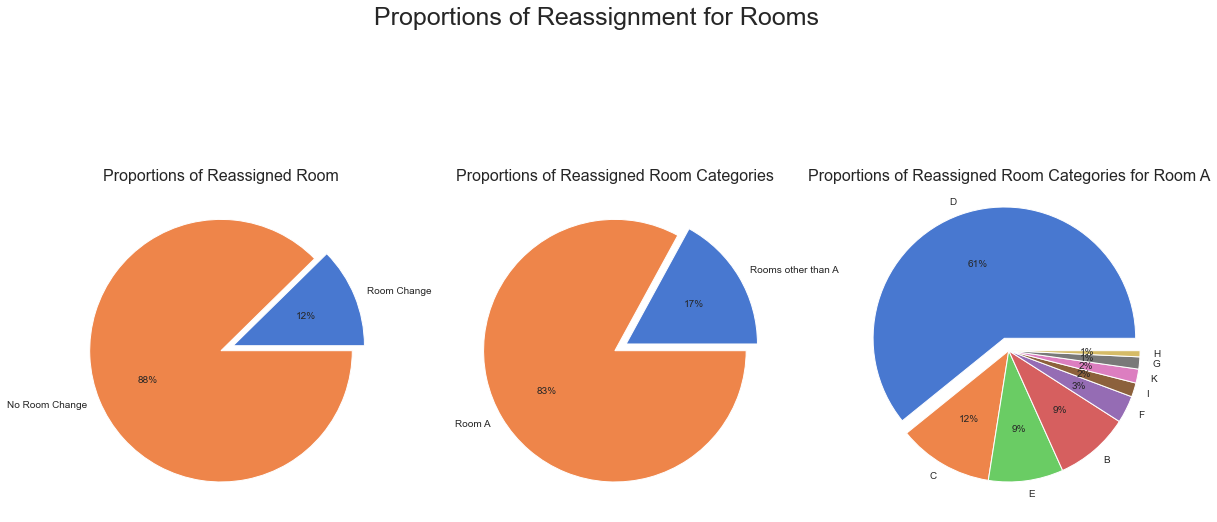

In [36]:
df_temp=df[df['reserved_room_type']!=df['assigned_room_type']]
room_mis_lst=[df_temp.count()['hotel'],
              df[df['reserved_room_type']==df['assigned_room_type']].count()['hotel']]

A_mis_lst=[df_temp.count()['hotel']-df_temp.groupby('reserved_room_type')['assigned_room_type'].get_group('A').count(),
           df_temp.groupby('reserved_room_type')['assigned_room_type'].get_group('A').count()]
labels=['Room Change','No Room Change']
colors=sns.color_palette('muted')

fig=plt.figure(figsize=(20,10))

ax1=fig.add_subplot(131)
ax1.pie(room_mis_lst,labels=labels,explode=[0.1,0],colors=colors,autopct='%.f%%')
ax1.set_title('Proportions of Reassigned Room',fontsize=16)

ax2=fig.add_subplot(132)
ax2.pie(A_mis_lst,labels=['Rooms other than A','Room A'],explode=[0.1,0],colors=colors,autopct='%.f%%')
ax2.set_title('Proportions of Reassigned Room Categories',fontsize=16)

df_temp1=df_temp.groupby('reserved_room_type')['assigned_room_type'].get_group('A').value_counts()

ax3=fig.add_subplot(133)
ax3.pie(df_temp1.values,labels=list(df_temp1.index),explode=[0.1,0,0,0,0,0,0,0,0],colors=colors,autopct='%.f%%')
ax3.set_title('Proportions of Reassigned Room Categories for Room A',fontsize=16)




plt.suptitle('Proportions of Reassignment for Rooms',fontsize=25)
plt.show()




### Insights:

* <b> The first figure shows that 12% of the total customers were assigned a room different than that reserved by them. In other words, there is a 12% chance that the rooms booked by the customers will be reassigned to a different room.  </b>


* <b> The second figure illustrates that 83% of the rooms that were reassigned were originally reserved to be of type A. To state differently, if the rooms were to be reassigned there is an 83% chance that the reserved room was type A while there is only 17% probability that the reserved rooms would be different than type A.</b>


* <b> The last figure depicts the probabilities of room types that would be reassigned to for the customers if the reserved room was type A and it was to be reassigned. Rooms of type A were reassigned to type D 61% of the time. This may be based of the observations that rooms of type D follows rooms of type A in popularity . It is then followed by type C with 12%, type E and type B with 9% each.  </b>

### Proportions of Booking Changes by Customers across Hotels:

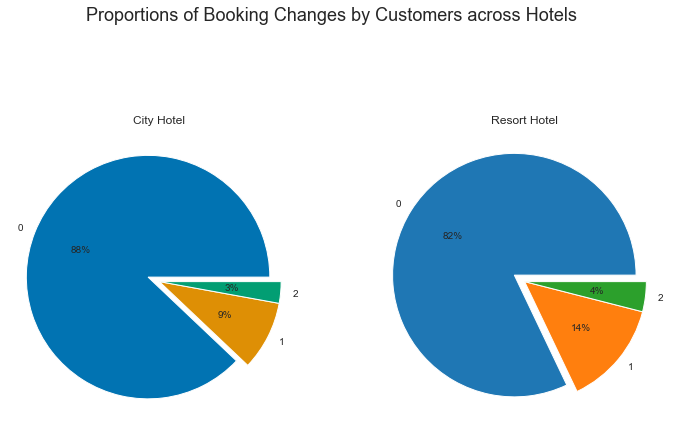

In [37]:
df_temp=df.groupby(['hotel','booking_changes']).count()['Total_customers']
df_temp1=df_temp.loc['City Hotel'].head(3)
df_temp2=df_temp.loc['Resort Hotel'].head(3)

fig=plt.figure(figsize=(12,8))
colors=sns.color_palette('colorblind')

ax1=fig.add_subplot(121)
ax1.pie(df_temp1.values,labels=list(df_temp1.index),colors=colors,explode=[0.1,0,0],autopct='%.f%%')
ax1.set_title('City Hotel',fontsize=12)

ax2=fig.add_subplot(122)
ax2.pie(df_temp2.values,labels=list(df_temp2.index),explode=[0.1,0,0],autopct='%.f%%')
ax2.set_title('Resort Hotel',fontsize=12)

plt.suptitle('Proportions of Booking Changes by Customers across Hotels',fontsize=18)
plt.show()



### Insights:

* <b> For the City Hotel, it is observed that about 12% of the customers make changes to their booking atleast once, with 9% of the customers making a single booking change and 3% of the customers making 2 booking changes. </b>


* <b>  For the Resort Hotel, it is observed that about 18% of the customers make changes to their booking atleast once, with 14% of the customers making a single booking change and 4% of the customers making 2 booking changes which are slightly higher than the City Hotel. </b>



### Deposit Types and Customers:

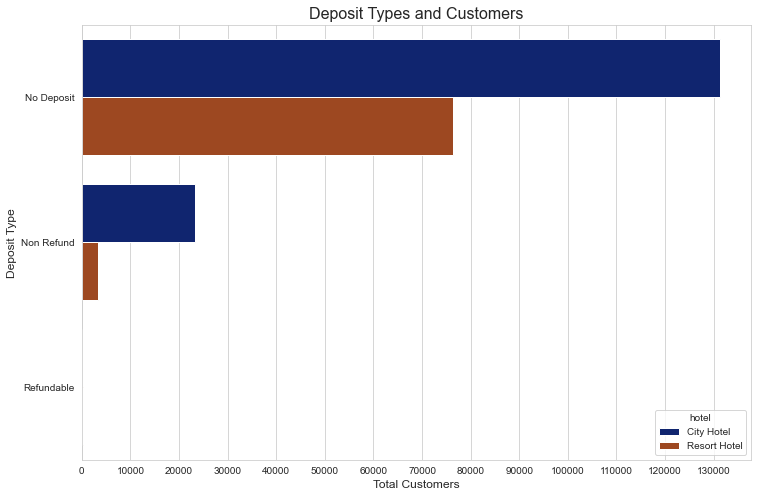

In [38]:
df_temp=df.groupby(['hotel','deposit_type']).sum()['Total_customers'].reset_index()
plt.figure(figsize=(12,8))
ax=sns.barplot(y='deposit_type',x='Total_customers',data=df_temp,hue='hotel',palette='dark',ci=None)
sns.move_legend(ax,loc='lower right')
plt.xticks(range(0,140000,10000))
plt.xlabel('Total Customers',fontsize=12)
plt.ylabel('Deposit Type',fontsize=12)
plt.title('Deposit Types and Customers',fontsize=16)
plt.show()

### Terms:

* <b> No Deposit      : No Deposit was made</b>


* <b> Non Refund      : A deposit was made in the value of the total stay cost</b>


* <b> Refundable      : A deposit was made with a value under the total cost of stay</b>



### Insights:

* <b> Almost 90% of the customers don't remit a deposit amount at both the hotels.  </b>


* <b> It is also interesting to note that the rest 10% of the customers opt for a Non Refundable Deposit Scheme rather than a Refundable Deposit Scheme which is negligibly small. </b>




## Complete Analysis of ADR (Average Daily Rate) and Associated Factors:

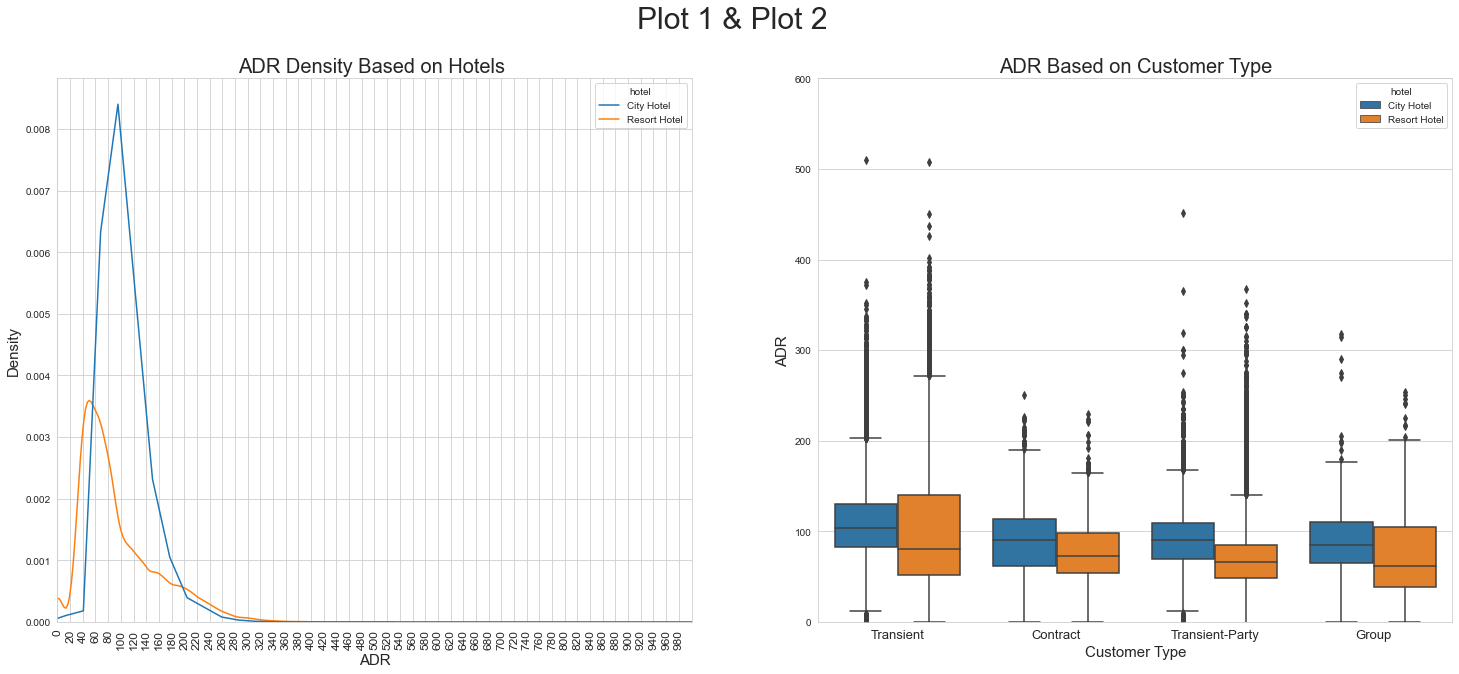

In [39]:
fig,axes=plt.subplots(1,2,figsize=(25,10))

#plot1
sns.kdeplot(x=df['adr'],hue=df['hotel'],hue_order=['City Hotel','Resort Hotel'],ax=axes[0])
axes[0].set_xlim(0,1000)
axes[0].set_xticks(ticks=range(0,1000,20))
axes[0].set_xticklabels(axes[0].get_xticks(),rotation=90,fontsize=12)

axes[0].set_xlabel('ADR',fontsize=15)
axes[0].set_ylabel('Density',fontsize=15)

axes[0].set_title('ADR Density Based on Hotels ',fontsize=20)

#plot2
sns.boxplot(x=df['customer_type'],y=df['adr'],hue=df['hotel'],
            hue_order=['City Hotel','Resort Hotel'],ax=axes[1])
axes[1].set_ylim(0,600)

axes[1].xaxis.set_tick_params(labelsize=13)
axes[1].set_xlabel('Customer Type',fontsize=15)
axes[1].set_ylabel('ADR',fontsize=15)

axes[1].set_title('ADR Based on Customer Type',fontsize=20)

plt.suptitle('Plot 1 & Plot 2',fontsize=30)

plt.show()

## Insights:

### Plot 1 : ADR Density Based on Hotels :


* <b> It is observed that the most common ADR for the City Hotel is between 80 USD and 100 USD while it is between 40 USD and 60 USD for the Resort Hotel. Higher density of ADR for the City Hotel is because of higher customer inflow and it is also interesting to note that the Resort Hotel is much cheaper than the City hotel in general. </b>


### Plot 2 : ADR Based on Customer Type :


* <b> It can be inferred that the customers in the transient category are charged a slightly higher overall ADR than the customers in other categories. The customers in transient party, contract and group categories have their ADR more or less in a similar fashion. In all categories, the City Hotel charges a higher ADR than the Resort hotel. </b>

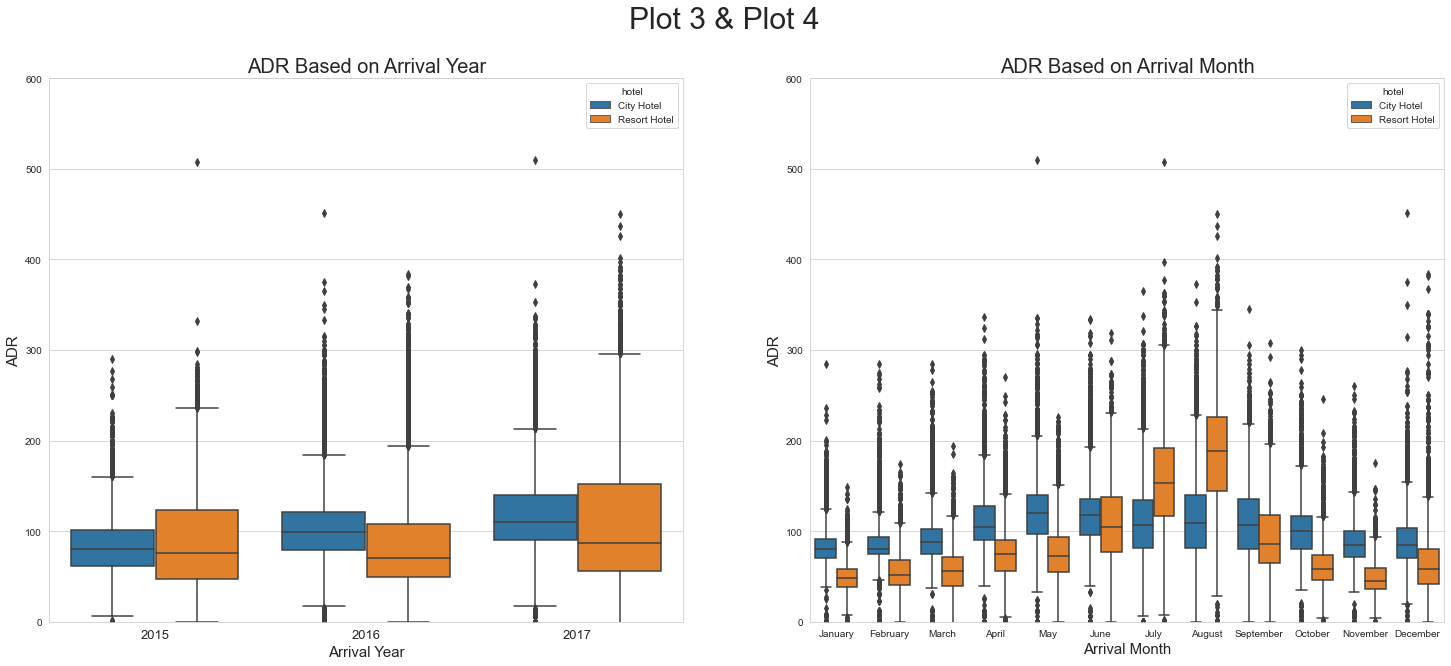

In [40]:
#plot3
fig,axes=plt.subplots(1,2,figsize=(25,10))


sns.boxplot(x=df['arrival_year'],y=df['adr'],hue=df['hotel'],
            hue_order=['City Hotel','Resort Hotel'],ax=axes[0])
axes[0].set_ylim(0,600)

axes[0].xaxis.set_tick_params(labelsize=13)
axes[0].set_xlabel('Arrival Year',fontsize=15)
axes[0].set_ylabel('ADR',fontsize=15)

axes[0].set_title('ADR Based on Arrival Year',fontsize=20)

#plot4
months=['January','February','March','April','May','June','July','August','September','October','November','December']
sns.boxplot(x=df['arrival_month'],y=df['adr'],hue=df['hotel'],order=months,
            hue_order=['City Hotel','Resort Hotel'],ax=axes[1])
axes[1].set_ylim(0,600)



axes[1].set_xlabel('Arrival Month',fontsize=15)
axes[1].set_ylabel('ADR',fontsize=15)

axes[1].set_title('ADR Based on Arrival Month',fontsize=20)

plt.suptitle('Plot 3 & Plot 4',fontsize=30)

plt.show()


## Insights:


### Plot 3 : ADR Based on Arrival Year:


* <b> For the City Hotel, it can be noted that the overall ADR has consistently increased over the years from 2015 to 2017. This may be due to the increase in customer inflow and inturn increased demand over the years as discussed earlier.</b>


* <b> For the Resort Hotel, it is seen that the median ADR from 2015 to 2016 was more or less constant. However, it is interesting to note that it significantly increased in the year 2017. Even though the median ADR of the City Hotel remains more than that of the Resort Hotel over the years, the maximum value of the ADR (100 percentile) is more for the Resort Hotel than the City Hotel throughout (touching nearly 300 USD in 2017). </b>

### Plot 4 : ADR Based on Arrival Month :


* <b> The plot follows a parabolic path as it gradully increases from the lowest ADR in January, reaches its peak in August and gradually declines till December. It is also significant to note that after May, the overall ADR of the Resort Hotel sharply increases and reaches at par with the City Hotel in June. It continues to increase in following month of July and the busiest month of August thereby having the overall and the maximum ADR (touching nearly 350USD) far higher than the City hotel. </b>


* <b> In the busiest months from May till September, it is very interesting to observe that the overall ADR of the City Hotel remains more or less constant inspite of the increasing demand. Whereases, after sharply increasing and reaching its peak value in August, the ADR of the Resort Hotel sharply declines in September becoming slightly lesser than the City Hotel.</b>


* <b> Through the year the ADR of the City Hotel is more than that of the Resort Hotel except for the months as discussed above. This may be due to an overall higher customer inflow for the City Hotel. ADR is the lowest for the months of January and November as they are the least busiest months as discussed earlier. </b>

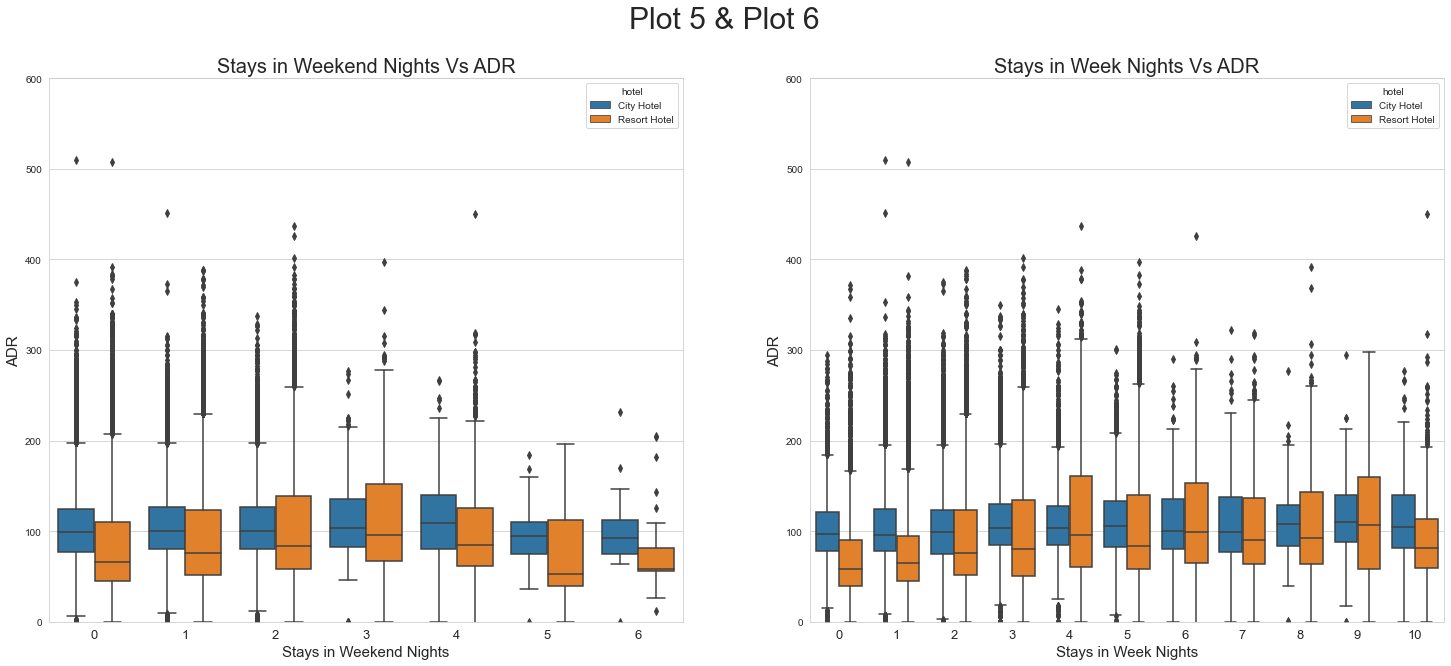

In [41]:
#plot5

fig,axes=plt.subplots(1,2,figsize=(25,10))

sns.boxplot(x=df['stays_in_weekend_nights'],y=df['adr'],hue=df['hotel'],
            hue_order=['City Hotel','Resort Hotel'],ax=axes[0])
axes[0].set_ylim(0,600)
axes[0].set_xlim(-0.5,6.5)

axes[0].xaxis.set_tick_params(labelsize=13)
axes[0].set_xlabel('Stays in Weekend Nights',fontsize=15)
axes[0].set_ylabel('ADR',fontsize=15)

axes[0].set_title('Stays in Weekend Nights Vs ADR',fontsize=20)

#plot6
sns.boxplot(x=df['stays_in_week_nights'],y=df['adr'],hue=df['hotel'],
            hue_order=['City Hotel','Resort Hotel'],ax=axes[1])
axes[1].set_ylim(0,600)
axes[1].set_xlim(-0.5,10.5)

axes[1].xaxis.set_tick_params(labelsize=13)
axes[1].set_xlabel('Stays in Week Nights',fontsize=15)
axes[1].set_ylabel('ADR',fontsize=15)

axes[1].set_title('Stays in Week Nights Vs ADR',fontsize=20)

plt.suptitle('Plot 5 & Plot 6',fontsize=30)

plt.show()


## Insights:


### Plot 5 : Stays in Weekend Nights Vs ADR:


* <b> The stays in weekend nights denotes the number of nights the customer has stayed on weekends. It is observed that the median ADR of the City Hotel is more or less constant whereas a slight increase in the median ADR is observed for the Resort Hotel from the 1st night till the 3rd night where it is relatively the highest and proceeds to decline after that.  </b>


* <b> Overall, the number of nights spent on weekends by the customers doesn't have a significant impact on the ADR as observed with other factors.</b>


### Plot 6 : Stays in Week Nights Vs ADR:


* <b> The stays in week nights denotes the number of nights the customer has stayed other than weekends. Following a similar fashion as the previous factor, it is observed that the median ADR of the City Hotel is more or less constant whereas a slight increase in the median ADR is observed for the Resort Hotel from the 1st night till the 4th night where it is relatively the highest (around 100 USD) and maintains that value for the forthcoming nights.  </b>


* <b> Overall, the number of nights spent on week nights by the customers doesn't have a significant impact on the ADR as observed with other factors.</b>

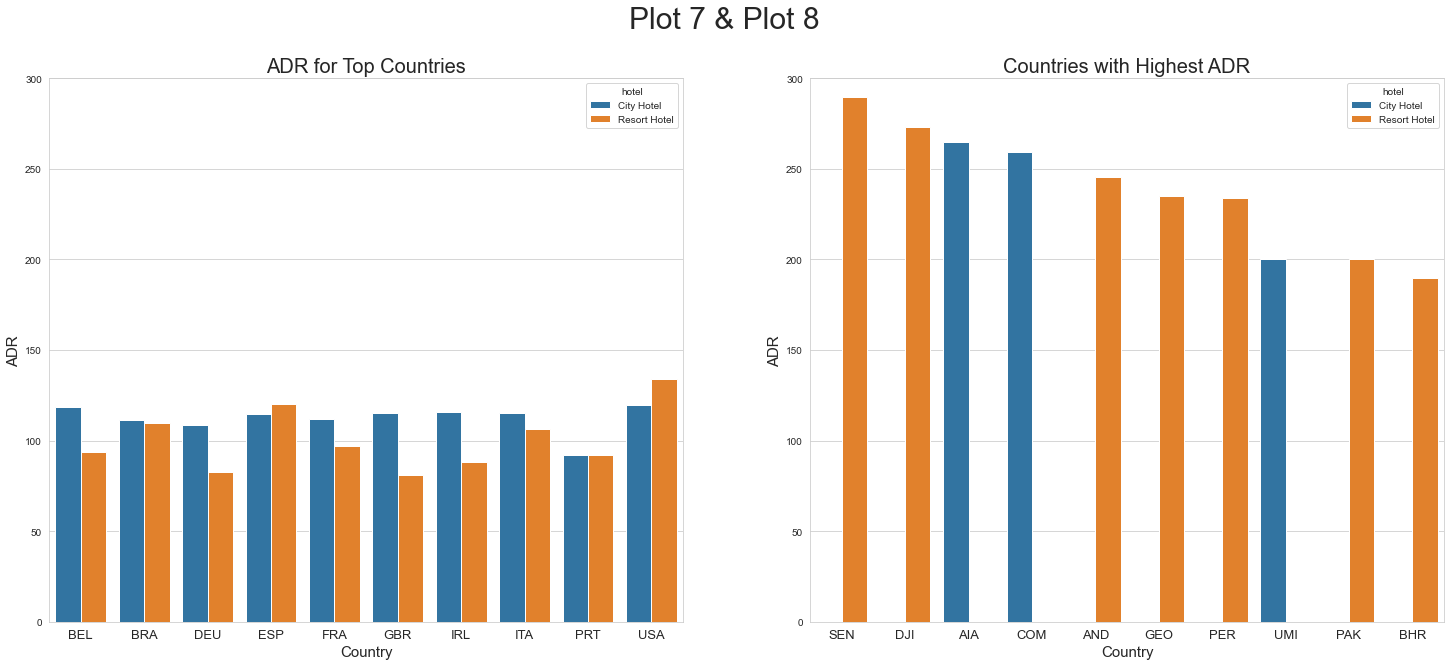

In [42]:
#plot7

fig,axes=plt.subplots(1,2,figsize=(25,10))

df_con=df.groupby('country').sum()['Total_customers'].sort_values(ascending=False).head(10).to_frame().reset_index()
countries=list(df_con['country'])

df_temp=df[df['country'].isin(countries)]
df_grp=df_temp.groupby(['hotel','country']).mean()['adr'].reset_index()

sns.barplot(x=df_grp['country'],y=df_grp['adr'],hue=df_grp['hotel'],
            hue_order=['City Hotel','Resort Hotel'],ax=axes[0])
axes[0].set_ylim(0,300)

axes[0].xaxis.set_tick_params(labelsize=13)
axes[0].set_xlabel('Country',fontsize=15)
axes[0].set_ylabel('ADR',fontsize=15)

axes[0].set_title('ADR for Top Countries',fontsize=20)

#plot8

df_exp_con=df.groupby(['hotel','country']).mean()['adr'].sort_values(ascending=False).head(10).to_frame().reset_index()
sns.barplot(x=df_exp_con['country'],y=df_exp_con['adr'],hue=df_exp_con['hotel'],
            hue_order=['City Hotel','Resort Hotel'],ax=axes[1])
axes[1].set_ylim(0,300)

axes[1].xaxis.set_tick_params(labelsize=13)
axes[1].set_xlabel('Country',fontsize=15)
axes[1].set_ylabel('ADR',fontsize=15)

axes[1].set_title('Countries with Highest ADR',fontsize=20)

plt.suptitle('Plot 7 & Plot 8',fontsize=30)

plt.show()


## Insights:

### Plot 7 : ADR for Top Countries:


* <b> The plot illustrates the ADR for the 10 countries from which most of the customers visit the hotels. ADR is the highest for the customers from USA for both the City Hotel (around 125 USD) and the Resort Hotel (around 135 USD) whereas it is the least for the local customers from Portugal at the City Hotel (around 95 USD). It is quite interesting to note that the Resort Hotel has their least values of ADR for the customers from Great Britian and Germany (around 80 USD) rather than the local customers from Portugal (around 95 USD). </b>


* <b> Overall, the number of nights spent on week nights by the customers doesn't have a significant impact on the ADR as observed with other factors.</b>


### Plot 8 : Countries with Highest ADR:


* <b> The plot depicts the countries from which the customers are generally charged an overall higher ADR and their respective hotel preferences. Overall, the ADR is between 185 USD to 285 USD with the customers from countries like Bahrain and Pakistan being charged the least and the customers from countries like Senegal and Djibouti charged the highest. </b>


* <b> It is also observed that 7 out of the 10 countries are charged the highest ADR at the Resort Hotel.</b>



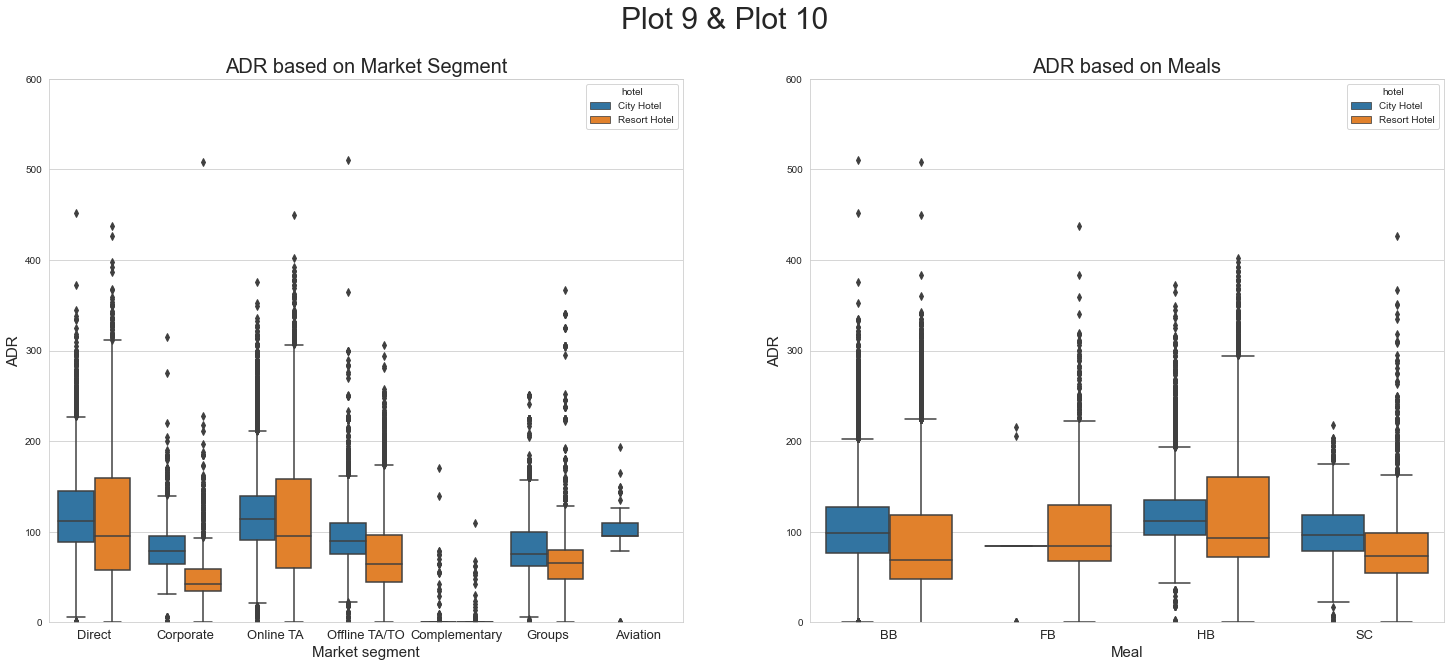

In [43]:

#plot9

fig,axes=plt.subplots(1,2,figsize=(25,10))

sns.boxplot(x=df['market_segment'],y=df['adr'],hue=df['hotel'],
            hue_order=['City Hotel','Resort Hotel'],ax=axes[0])
axes[0].set_ylim(0,600)

axes[0].xaxis.set_tick_params(labelsize=13)
axes[0].set_xlabel('Market segment',fontsize=15)
axes[0].set_ylabel('ADR',fontsize=15)

axes[0].set_title('ADR based on Market Segment',fontsize=20)


#plot10 
sns.boxplot(x=df['meal'],y=df['adr'],hue=df['hotel'],
            hue_order=['City Hotel','Resort Hotel'],ax=axes[1])
axes[1].set_ylim(0,600)

axes[1].set_xlabel('Meal',fontsize=15)
axes[1].set_ylabel('ADR',fontsize=15)

axes[1].xaxis.set_tick_params(labelsize=13)
axes[1].set_title('ADR based on Meals',fontsize=20)

plt.suptitle('Plot 9 & Plot 10',fontsize=30)

plt.show()


## Insights:

### Plot 9 : ADR based on Market Segment:


* <b> Customers coming through the Direct and Online TA market segments have an ADR that is more or less the same and is relatively higher than other market segments with the City Hotel charging a median ADR around 110 USD and the Resort Hotel charging a median ADR just about 100 USD. The maximum ADR for these market segments are with the Resort Hotel with figures soaring above 300 USD.</b>


* <b> Following these in the values of ADR, the Offline TA/TO and Groups market segment have their City Hotel median ADR values just shy of 100 USD for the former and ariund 75 USD for the latter. The Resort Hotel has a relatively lesser median ADR of around 65 USD for both these segments.</b>


* <b>  The Corporate market segment have their median ADR values much lesser than the other mentioned segments with the City Hotel charging a median ADR around 80 USD and the Resort Hotel charging just about 50 USD only. As the name already suggests, customers arriving through the complimentary segment are charged a negligibly small ADR value (nearly zero) for both the hotels. </b>


* <b> Even though the numbers are small, the customers coming via the aviation segment are charged a median ADR around 100 USD for the City Hotel and it is also seen that they do not prefer the Resort Hotel at all. In almost all the segments, the City hotel has a median ADR slightly higher than the Resort Hotel.  </b>



### Plot 10 : ADR based on Meals:


* <b> Customers choosing an HB type meal are charged a relatively higher ADR with the City Hotel median ADR around 115 USD and the Resort hotel median ADR around 95 USD. </b>


* <b> Customers opting for the most popular meal schemes BB and SC are charged a median ADR around 100 USD for the City Hotel and about 65 USD for the Resort Horel. With the FB meal type, the cutomers are charged around 90 USD for both the Hotels.</b>



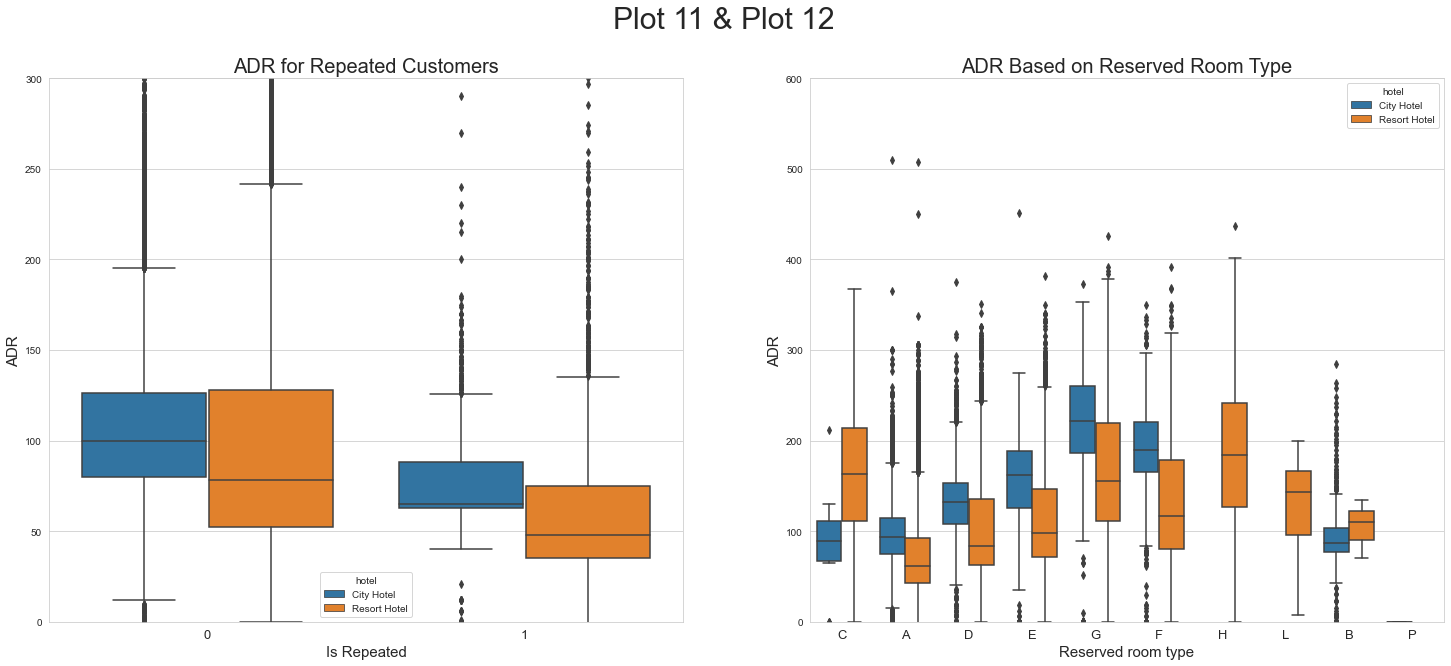

In [44]:

#plot11

fig,axes=plt.subplots(1,2,figsize=(25,10))

sns.boxplot(x=df['is_repeated_guest'],y=df['adr'],hue=df['hotel'],
            hue_order=['City Hotel','Resort Hotel'],ax=axes[0])
axes[0].set_ylim(0,300)
axes[0].xaxis.set_tick_params(labelsize=13)
axes[0].set_xlabel('Is Repeated',fontsize=15)
axes[0].set_ylabel('ADR',fontsize=15)

axes[0].set_title('ADR for Repeated Customers',fontsize=20)

#plot12
sns.boxplot(x=df['reserved_room_type'],y=df['adr'],hue=df['hotel'],
            hue_order=['City Hotel','Resort Hotel'],ax=axes[1])
axes[1].set_ylim(0,600)

axes[1].xaxis.set_tick_params(labelsize=13)
axes[1].set_xlabel('Reserved room type',fontsize=15)
axes[1].set_ylabel('ADR',fontsize=15)

axes[1].set_title('ADR Based on Reserved Room Type',fontsize=20)

plt.suptitle('Plot 11 & Plot 12',fontsize=30)

plt.show()


## Insights:

### Plot 11 : ADR for Repeated Customers :


* <b> Even through the proportion of repeated customers are very low for both the hotels as discussed earlier, it is quite significant to note that the repeated customers are charged a lesser ADR than the customers visting for the first time. Repeated customers are charged around 65 USD for the City Hotel and just about 50 USD for the Resort Hotel whereas the customers visiting for the first time are charged around 100 USD ( around 54% more) for the City hotel and 75 USD (50% more) for the Resort Hotel. </b>



### Plot 12 : ADR based on Reserved Room Type :


* <b> The room type H at the Resort Hotel is the highest priced room with a median ADR around 200 USD and the maximum ADR at a soaring price of 400 USD. For the Resort Hotel, following the room type H in prices are the rooms of type C, G, L, F, B, E, D, A with their median ADR around 170 USD, 150 USD, 140 USD, 120 USD, 110 USD, 100 USD, 80 USD and 65 USD respectively.</b>


* <b> For the City Hotel, the room of type G is the highest priced room with a median ADR around 220 USD. Following the room type G in prices are the rooms of type F, E, D, A, C and B with their median ADR around 190 USD, 150 USD, 140 USD, 100 USD, 100 USD and 90 USD respectively.</b>



* <b> It is quite interesting to note that the customer preferences are closely linked to the median ADR charged according to room type. Rooms A and D are the cheapest at the Resort Hotel and are also among the cheapest rooms in the City Hotel. As discussed earlier, these rooms are also the most preferred ones for both the hotels.</b>



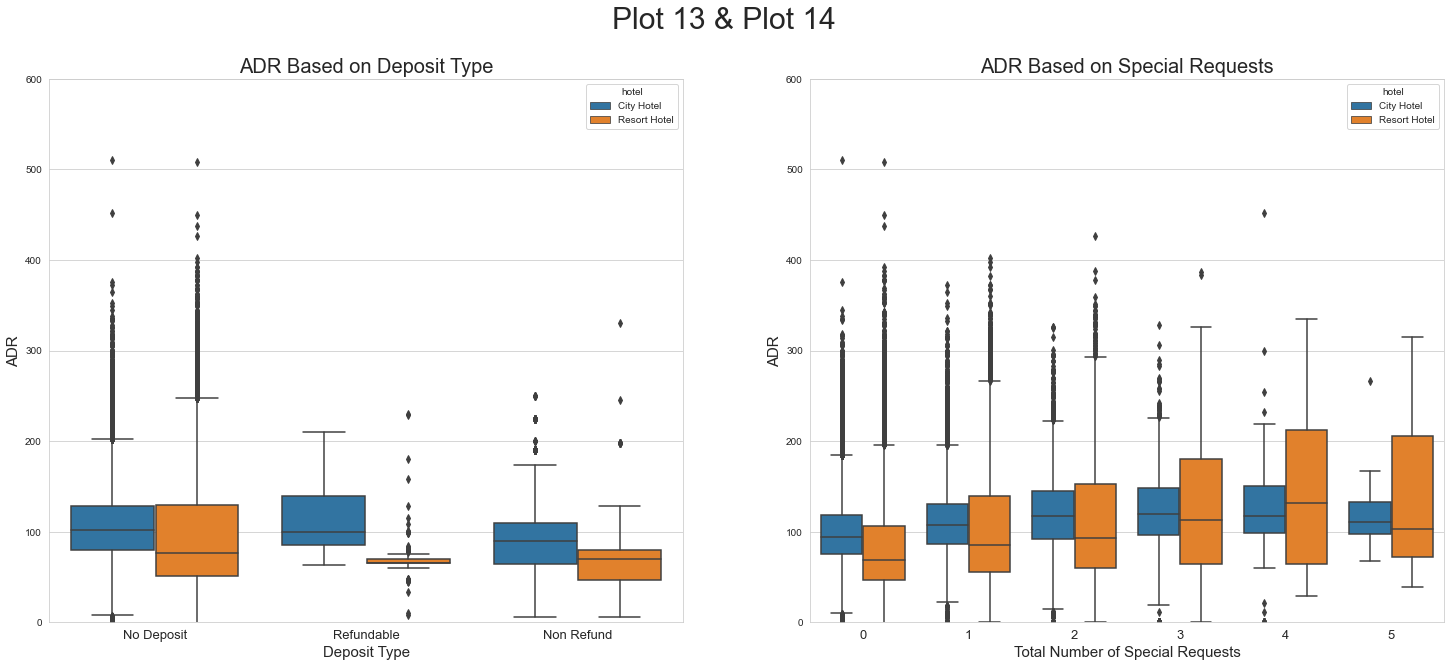

In [45]:

#plot13

fig,axes=plt.subplots(1,2,figsize=(25,10))

sns.boxplot(x=df['deposit_type'],y=df['adr'],hue=df['hotel'],
            hue_order=['City Hotel','Resort Hotel'],ax=axes[0])
axes[0].set_ylim(0,600)

axes[0].xaxis.set_tick_params(labelsize=13)
axes[0].set_xlabel('Deposit Type',fontsize=15)
axes[0].set_ylabel('ADR',fontsize=15)

axes[0].set_title('ADR Based on Deposit Type',fontsize=20)

#plot14
sns.boxplot(x=df['total_of_special_requests'],y=df['adr'],hue=df['hotel'],
            hue_order=['City Hotel','Resort Hotel'],ax=axes[1])
axes[1].set_ylim(0,600)
axes[1].xaxis.set_tick_params(labelsize=13)
axes[1].set_xlabel('Total Number of Special Requests',fontsize=15)
axes[1].set_ylabel('ADR',fontsize=15)

axes[1].set_title('ADR Based on Special Requests',fontsize=20)

plt.suptitle('Plot 13 & Plot 14',fontsize=30)

plt.show()


## Insights:

### Plot 13 : ADR based on Deposit Type :


* <b> Customers opting for the No Deposit Scheme and the Refundable Deposit Scheme are charged more or less the same ADR for both the City Hotel and the Resort Hotel. However, customers opting for the Non Refundable Deposit Scheme are charged a little less around 90 USD for the City Hotel and around 70 USD for the Resort Hotel. </b>


* <b>Overall, it is inferred that the choice of deposit scheme doesn't have a significant impact on the ADR as observed with other factors.</b>



### Plot 14 : ADR based on Special Requests :


* <b>  It is observed from the plot that as the number of special requests increases, the median ADR also increases for both the hotels. For no special requests made, the median ADR was around 95 USD for the City hotel and 70 USD for the Resort hotel. Whereas for 4 special requests made, the median ADR increased reaching 140 USD (100% increase) for the Resort Hotel and 120 USD (around 16% increase) for the City Hotel.</b>



### Proportions of Required Car Parking Spaces for Hotels:

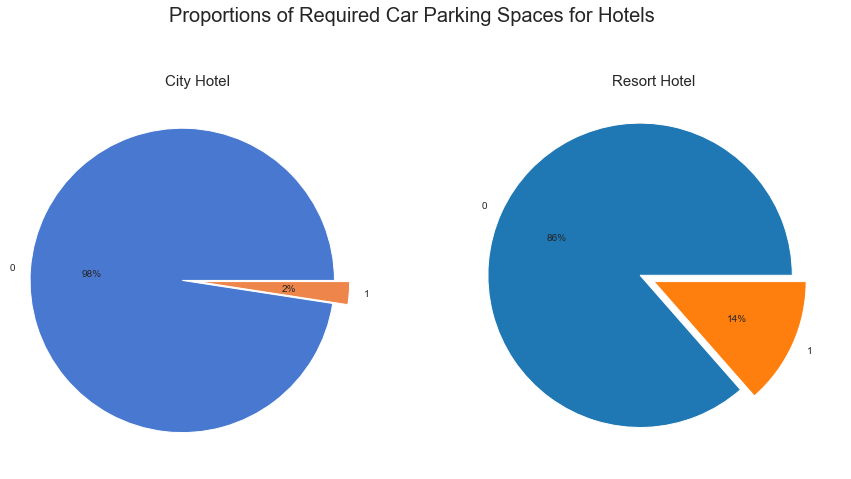

In [46]:
fig=plt.figure(figsize=(15,8))

df_temp=df.groupby('hotel')['required_car_parking_spaces'].get_group('City Hotel').value_counts().head(2)
df_temp1=df.groupby('hotel')['required_car_parking_spaces'].get_group('Resort Hotel').value_counts().head(2)
colors=sns.color_palette('muted')

ax1=fig.add_subplot(121)
ax1.pie(df_temp,labels=list(df_temp.index),explode=[0.1,0],colors=colors,autopct='%.f%%')
ax1.set_title('City Hotel',fontsize=15)

ax2=fig.add_subplot(122)
ax2.pie(df_temp1,labels=list(df_temp1.index),explode=[0.1,0],autopct='%.f%%')
ax2.set_title('Resort Hotel',fontsize=15)

plt.suptitle('Proportions of Required Car Parking Spaces for Hotels',fontsize=20)

plt.show()

### Insights:

* <b> It is quite interesting to note that only 2% of the total customers have required a parking space at the City Hotel, despite the Hotel hosting a large number of customers. For the Resort Hotel, 14% of customers have required a parking space which is relatively higher when compared to the City Hotel but still on the lower side when compared to the overall customer inflow.</b>






### Proportions of Reservation Statuses for Hotels:

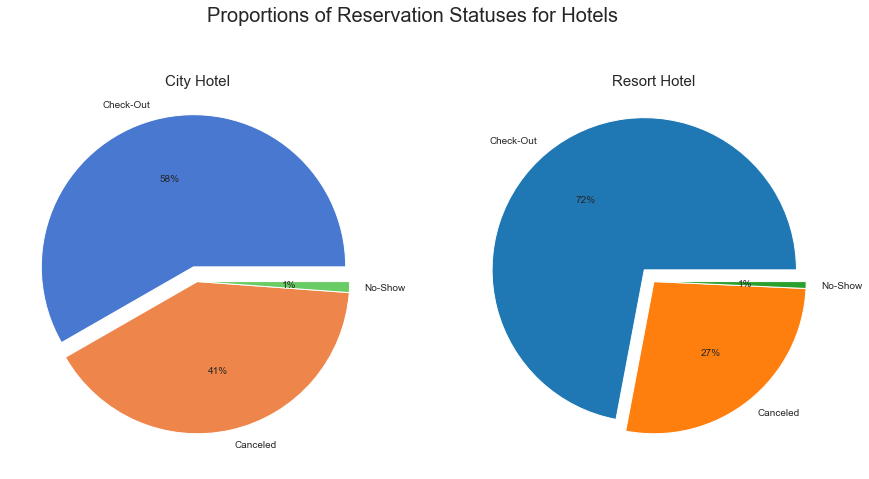

In [47]:
fig=plt.figure(figsize=(15,8))

df_temp=df.groupby('hotel')['reservation_status'].get_group('City Hotel').value_counts()
df_temp1=df.groupby('hotel')['reservation_status'].get_group('Resort Hotel').value_counts()
colors=sns.color_palette('muted')

ax1=fig.add_subplot(121)
ax1.pie(df_temp,labels=list(df_temp.index),explode=[0.1,0,0],colors=colors,autopct='%.f%%')
ax1.set_title('City Hotel',fontsize=15)

ax2=fig.add_subplot(122)
ax2.pie(df_temp1,labels=list(df_temp1.index),explode=[0.1,0,0],autopct='%.f%%')
ax2.set_title('Resort Hotel',fontsize=15)

plt.suptitle('Proportions of Reservation Statuses for Hotels',fontsize=20)

plt.show()

### Insights:

* <b> It is of atmost importance to note that out of the total reservations at the City Hotel over the years, 41% of customers have cancelled their booking which is significantly high. 58% of the customers have arrived at the hotel and checked out as expected of them while making a booking.</b>


* <b> For the Resort Hotel, 27% of the total customers have cancelled their bookings which is relatively low when compared to the City Hotel and the rest 72% customers arrived at the hotel and checked out as expected.</b>



* <b> For both the hotels, only 1% of the customers have made a booking and not showed up which is negligibly small.</b>





### Exploring the Interdependence of Various Factors:

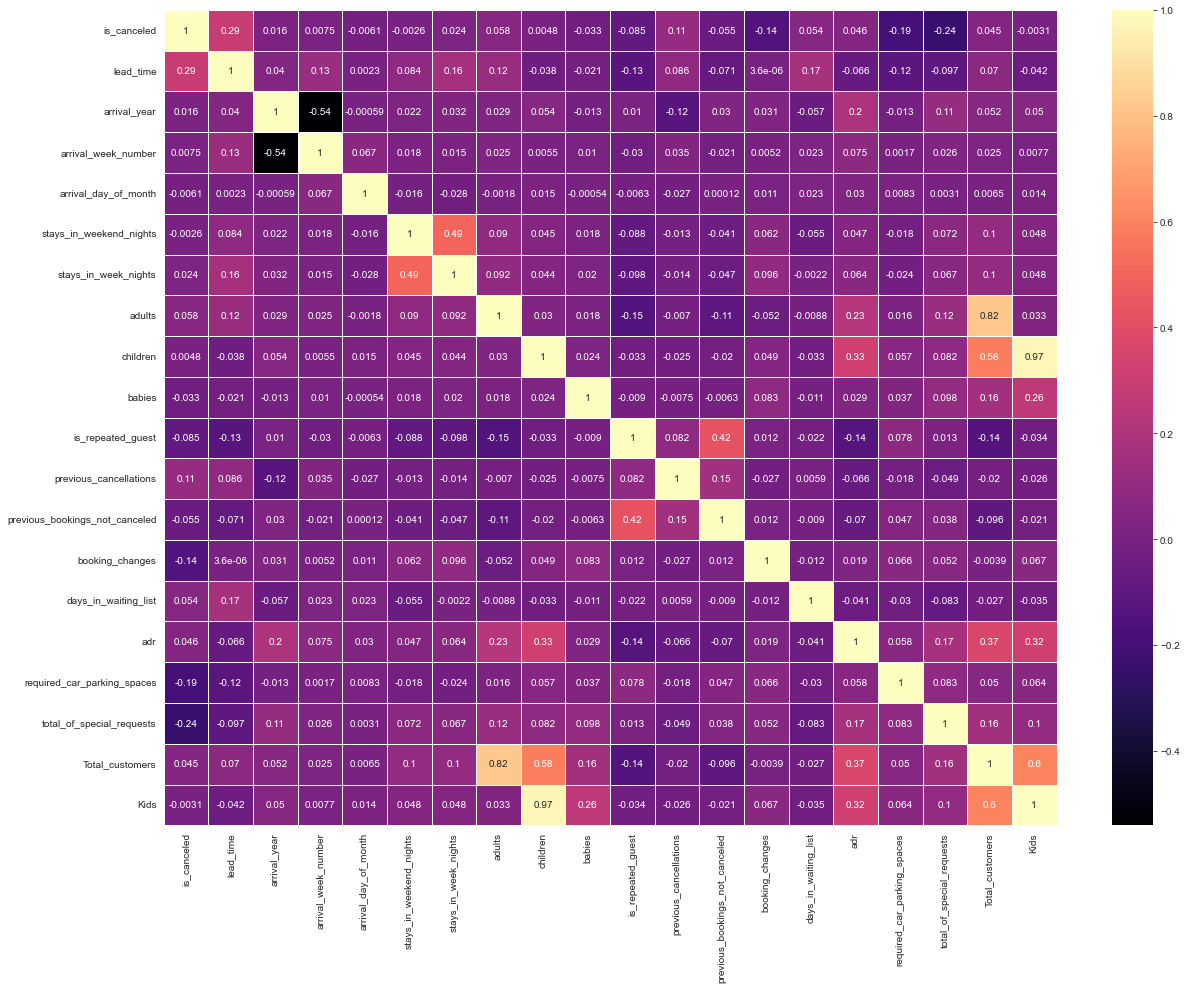

In [48]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=1,linecolor='white',cmap='magma',annot=True)
plt.show()

### Important Insights:

* <b> A mild positive correlation can be observed between the lead time and 'is cancelled' factor which suggests that as the lead time increases, the probability of a customer cancelling the booking also increases.</b>


* <b> A very mild positive correlation is observed between the arrival year and ADR which suggests that as the arrival year increases, the ADR also increases. This is also evident from the plot as discussed earlier.</b>



* <b> A strong positive correlation is observed between stay in week nights and stay in weekend nights which suggests that as the number of nights that a customer spends at a hotel other than weekend increases, the prbability that a customer will stay at the hotel for the coming weekend nights also increases. </b>


* <b> A mild positive correlation can be observed between adults, children and the ADR which suggests that as the number of adults and children increases, the ADR also increases. It is quite interesting to note that the number of babies do not have any influence on the ADR.</b>



* <b> A strong positive correlation is observed between the 'previous booking not cancelled' factor and the 'is repeated guest' factor which suggests that if a customer is a repeated guest, it is more likely that they have not cancelled a previous booking.</b>


# Conclusion 


<b> Overall, the analytical study has been fruitful in significantly understanding almost all aspects of the data. The project was successful in drawing varied insights regarding the customers trends and preferences across both the hotels under consideration which is inline with the objective of the analysis. Furthermore, this in-depth study could prove much useful in answering a lot of queries the hotel management system might have regarding the performance of hotels under various circumstances. The insights generated are much valuable and could undoubtedly be used to drive future decisions and to implemet strategical measures and policies for improving the overall performance of both the hotels. </b>  


